# E-Commerce: Product Range Analysis

# Table of Contents:

<div style="height:10px;"></div>

1. [Data Overview and Preprocessing:](#-Preprocessing)
   * [Download the data, Renaming Column Names, Adding necessary column and Study the general information (using info(), describe..)](#-info)
   * [Check for missing values, duplicated rows and other abnormal data (such as: zero and negative values) and choose appropriate ways to deal with them. Chande data type if needed](#-missing)
   * [Study the distribution and dispertion (outliers)](#-dist)
   * [Trying to find color and size traits out of product names](#-color)


<div style="height:5px;"></div>

2. [Product Description Analysis:](#-Analysis)
   * [Create a corpus out of product descriptions.](#-corpus)
   * [Clean up the corpus and removed stopwords etc,Eliminate grammatical variations via stemming](#-clean)
   * [Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix.](#-tfidf)
   * [Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.](#-distance)
   * [Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined](#-dendrogram)
   * [Using Kmean to form the clusters](#-kmeans)
   * [Study the term frequencies for each cluster.](#-terms_freq)
   * [Based on the term frequencies, identify product category keywords for each cluster.](#-keywords)
   * [Categorizing the products in the store differently in order to get result that enable better understanding of product range.](#-categorization)
   * [Calculating monthly revenue and monthly cumulating revenue to detect the trend](#-revenue) 
   * [Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales](#-split)
   * [Finding the top ten selling products](#-selling)
   * [Examining Refunds: by total amount and by frequency](#-refunds)

   
    
<div style="height:5px;"></div>

3. [Product Bundle(Basket) Analysis and Recommender System:](#-recommender)
   * [Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm](#-basket)
   * [Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products](#-additional)
   * [Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products](#-interchangable)


<div style="height:5px;"></div> 

4. [Product Market Values Analysis:](#-market)
   * [Calculate product recency-frequency-monetary (RFM Metrics)](#-rfm)
   * [Study product RFM distributions (in order to determine the segmentation split)](#-split)
   * [Categorize products based on K-MEANS](#-categorize)
   * [Charactarize the product clusters based on R, F and M scores](#-RFM_scores)
 
   
<div style="height:10px;"></div>


5. [Conclusions and Suggestions:](#-conclusions)
 
<div style="height:10px;"></div>

<b id="-Preprocessing">

## Data Overview and Preprocessing:

* Download the data, Renaming Column Names, Adding necessary columns and  Study the general information (using info(), describe..)  
* Check for missing values, duplicated rows and other abnormal data (such as: zero and negative values) and choose appropriate ways to deal with them. Chande data type if needed.
* Study the distribution and dispertion (outliers)
* Trying to find color and size traits out of product names

In [1]:
# Downdload libraries:

! pip install sidetable
! pip install plotly -U
! pip install altair -U
! pip install -U kaleido
! pip install --user -U nltk
! pip install nltk
! pip install apyori
! pip install mlxtend
!pip install -U scikit-learn 

In [2]:
# Import libraries

import re
import os
import codecs
import sys
import sidetable as stb
import numpy as np
import math as mth
import pandas as pd

import datetime as dt
from datetime import datetime,  timedelta
from textwrap import wrap
import plotly.offline as py
import plotly.offline as pyoff
import plotly as py
import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py 
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for features in linear regression to be standardized
 # metric for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Use silhouette coefficient to determine the best number of clusters
from sklearn.metrics import silhouette_score
# RFM-segmentation using K-means
import sklearn.cluster
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy import stats as st
import scipy.stats as stats

from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.spatial.distance import pdist, squareform

import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from pymystem3 import Mystem
from collections import Counter

#libraries for Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gome\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Preprocessing:

# Function aimed to check the data for missing values and other possible errors:

def preprocess_df(dataframe: pd.core.frame.DataFrame, title: str):
    print(f'df: {title}')
    # look at a random sample of the data and study the information given:
    display(dataframe.sample(10))
    print()
    dataframe.info(memory_usage='deep')
    print()
    display(dataframe.describe().T)# include ='all'
    display(dataframe.describe(include ='object').T)
    #display(dataframe.describe(include ='all').T)
    print()
    # Using sidetable method to look at the missing values per column, how many there are and their share (presentage).
    display(dataframe.stb.missing(style = True))
    print()
    print(f'There are {dataframe.duplicated().sum()} duplicated rows')
    print('\n'*2)
    for colname in dataframe.columns:
        print(f'column: {colname.upper()}')
        #print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
        #display(dataframe.stb.freq([colname], style = True, cum_cols = False))
        print(f'The unique values of column {colname.upper()} are:')
        display(dataframe[colname].unique())
        print(f'The number of NULL values in {colname} are:')
        display(dataframe[colname].isnull().sum())
        #print('share of missing values regarding their column' in order to figure out how significant their absence is for their category or column 
        print(f'Null values ratio: {round(dataframe[colname].isnull().sum() * 100 / len(dataframe[colname]),3)} %')
        if dataframe[colname].isnull().sum() > 0 :
            print(f'The rows with the missing values for {colname} column are the following:')
            display(dataframe[dataframe[colname].isnull()])
        display(dataframe[colname].describe(include ='all').to_frame().T)
        print('\n'*3)


<b id="-info"> 

### Download the data, Renaming Column Names, Adding necessary columns and Study the general information:

In [4]:
# Read the file at the top of the page:

try:
    df = pd.read_csv('ecommerce_dataset_us.csv' ,parse_dates=['InvoiceDate'], sep = '\t').copy() 
except:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', parse_dates=['InvoiceDate'], sep = '\t').copy() 

    
# Replace the column names (make them lowercase and add '_' between the words for a column name that consists more than one word):
df.columns = df.columns.str.replace('No','_no')
df.columns = df.columns.str.replace('Date','_datetime')
df.columns = df.columns.str.replace('Code','_code')
df.columns = df.columns.str.replace('Price','_price')
df.columns = df.columns.str.replace('ID','_id')

# Make all column names lowercase:
df.columns = df.columns.str.lower() 

# Make all description values lowecase
df['description'] = df['description'].str.lower() 

In [5]:
df['invoice_datetime'] = pd.to_datetime(df['invoice_datetime'])
df['invoice_period']= df['invoice_datetime'].apply(lambda x: x.strftime('%Y-%m'))

# Create seperate columns to date:
df['invoice_date']=pd.to_datetime(df['invoice_datetime']).dt.normalize()

# Add another column for total order price: 
df['tot_order'] = df['quantity']*df['unit_price']

In [6]:
# Using the function in order to detect proplems in the data and rule out the possibility of unreliability of the information (before analysis): 
preprocess_df(df, 'Ecommerce')

df: Ecommerce


invoice_no stock_code                       description  quantity  \
310530     564188      22289  hanging metal chicken decoration         6   
180355     552315      22984                card gingham rose         12   
513920     579629      20727           lunch bag  black skull.         2   
277710     561191      21914            blue harmonica in box         60   
345913     567182      22570          feltcraft cushion rabbit         2   
43710      540120      22730        alarm clock bakelike ivory         8   
443889     574714      22553            plasters in tin skulls         2   
3414       536627      22776      cakestand, 3 tier, loveheart         2   
457776     575747      84378     set of 3 heart cookie cutters        12   
29840      538827      22879        number tile vintage font 0        24   

          invoice_datetime  unit_price  customer_id invoice_period  \
310530 2019-08-21 15:33:00        1.25      13140.0        2019-08   
180355 2019-05-06 16:10:00        0.42      12700.0        2019-05   
513920 2019-11-28 12:16:00        1.65      14963.0        2019-11   
277710 2019-07-23 13:42:00        1.25      15129.0        2019-07   
345913 2019-09-16 15:21:00        3.75      13334.0        2019-09   
43710  2019-01-03 10:08:00        3.75      17675.0        2019-01   
443889 2019-11-04 14:29:00        1.65      15427.0        2019-11   
3414   2018-11-30 10:53:00        9.95      15658.0        2018-11   
457776 2019-11-09 10:19:00        1.45      12589.0        2019-11   
29840  2018-12-12 12:59:00        0.42      14298.0        2018-12   

       invoice_date  tot_order  
310530   2019-08-21       7.50  
180355   2019-05-06       5.04  
513920   2019-11-28       3.30  
277710   2019-07-23      75.00  
345913   2019-09-16       7.50  
43710    2019-01-03      30.00  
443889   2019-11-04       3.30  
3414     2018-11-30      19.90  
457776   2019-11-09      17.40  
29840    2018-12-12      10.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        541909 non-null  object        
 1   stock_code        541909 non-null  object        
 2   description       540455 non-null  object        
 3   quantity          541909 non-null  int64         
 4   invoice_datetime  541909 non-null  datetime64[ns]
 5   unit_price        541909 non-null  float64       
 6   customer_id       406829 non-null  float64       
 7   invoice_period    541909 non-null  object        
 8   invoice_date      541909 non-null  datetime64[ns]
 9   tot_order         541909 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 165.7 MB



count          mean          std        min       25%  \
quantity     541909.0      9.552250   218.081158  -80995.00      1.00   
unit_price   541909.0      4.611114    96.759853  -11062.06      1.25   
customer_id  406829.0  15287.690570  1713.600303   12346.00  13953.00   
tot_order    541909.0     17.987795   378.810824 -168469.60      3.40   

                  50%       75%       max  
quantity         3.00     10.00   80995.0  
unit_price       2.08      4.13   38970.0  
customer_id  15152.00  16791.00   18287.0  
tot_order        9.75     17.40  168469.6

count unique                                 top   freq
invoice_no      541909  25900                              573585   1114
stock_code      541909   4070                              85123A   2313
description     540455   4206  white hanging heart t-light holder   2369
invoice_period  541909     14                             2019-11  86074


There are 5268 duplicated rows



column: INVOICE_NO
The unique values of column INVOICE_NO are:


array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

The number of NULL values in invoice_no are:


0

Null values ratio: 0.0 %


count unique     top  freq
invoice_no  541909  25900  573585  1114





column: STOCK_CODE
The unique values of column STOCK_CODE are:


array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

The number of NULL values in stock_code are:


0

Null values ratio: 0.0 %


count unique     top  freq
stock_code  541909   4070  85123A  2313





column: DESCRIPTION
The unique values of column DESCRIPTION are:


array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'lost',
       'cream hanging heart t-light holder',
       'paper craft , little birdie'], dtype=object)

The number of NULL values in description are:


1454

Null values ratio: 0.268 %
The rows with the missing values for description column are the following:


invoice_no stock_code description  quantity    invoice_datetime  \
622        536414      22139         NaN        56 2018-11-29 11:52:00   
1970       536545      21134         NaN         1 2018-11-29 14:32:00   
1971       536546      22145         NaN         1 2018-11-29 14:33:00   
1972       536547      37509         NaN         1 2018-11-29 14:33:00   
1987       536549     85226A         NaN         1 2018-11-29 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581         NaN        -2 2019-12-05 18:26:00   
535326     581203      23406         NaN        15 2019-12-05 18:31:00   
535332     581209      21620         NaN         6 2019-12-05 18:35:00   
536981     581234      72817         NaN        27 2019-12-06 10:33:00   
538554     581408      85175         NaN        20 2019-12-06 14:06:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
622            0.0          NaN        2018-11   2018-11-29        0.0  
1970           0.0          NaN        2018-11   2018-11-29        0.0  
1971           0.0          NaN        2018-11   2018-11-29        0.0  
1972           0.0          NaN        2018-11   2018-11-29        0.0  
1987           0.0          NaN        2018-11   2018-11-29        0.0  
...            ...          ...            ...          ...        ...  
535322         0.0          NaN        2019-12   2019-12-05       -0.0  
535326         0.0          NaN        2019-12   2019-12-05        0.0  
535332         0.0          NaN        2019-12   2019-12-05        0.0  
536981         0.0          NaN        2019-12   2019-12-06        0.0  
538554         0.0          NaN        2019-12   2019-12-06        0.0  

[1454 rows x 10 columns]

count unique                                 top  freq
description  540455   4206  white hanging heart t-light holder  2369





column: QUANTITY
The unique values of column QUANTITY are:


array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

The number of NULL values in quantity are:


0

Null values ratio: 0.0 %


count     mean         std      min  25%  50%   75%      max
quantity  541909.0  9.55225  218.081158 -80995.0  1.0  3.0  10.0  80995.0





column: INVOICE_DATETIME
The unique values of column INVOICE_DATETIME are:


array(['2018-11-29T08:26:00.000000000', '2018-11-29T08:28:00.000000000',
       '2018-11-29T08:34:00.000000000', ...,
       '2019-12-07T12:31:00.000000000', '2019-12-07T12:49:00.000000000',
       '2019-12-07T12:50:00.000000000'], dtype='datetime64[ns]')

The number of NULL values in invoice_datetime are:


0

Null values ratio: 0.0 %


count unique                 top  freq               first  \
invoice_datetime  541909  23260 2019-10-29 14:41:00  1114 2018-11-29 08:26:00   

                                last  
invoice_datetime 2019-12-07 12:50:00





column: UNIT_PRICE
The unique values of column UNIT_PRICE are:


array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

The number of NULL values in unit_price are:


0

Null values ratio: 0.0 %


count      mean        std       min   25%   50%   75%      max
unit_price  541909.0  4.611114  96.759853 -11062.06  1.25  2.08  4.13  38970.0





column: CUSTOMER_ID
The unique values of column CUSTOMER_ID are:


array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

The number of NULL values in customer_id are:


135080

Null values ratio: 24.927 %
The rows with the missing values for customer_id column are the following:


invoice_no stock_code                      description  quantity  \
622        536414      22139                              NaN        56   
1443       536544      21773  decorative rose bathroom bottle         1   
1444       536544      21774  decorative cats bathroom bottle         2   
1445       536544      21786               polkadot rain hat          4   
1446       536544      21787            rain poncho retrospot         2   
...           ...        ...                              ...       ...   
541536     581498     85099B          jumbo bag red retrospot         5   
541537     581498     85099C   jumbo  bag baroque black white         4   
541538     581498      85150    ladies & gentlemen metal sign         1   
541539     581498      85174                s/4 cacti candles         1   
541540     581498        DOT                   dotcom postage         1   

          invoice_datetime  unit_price  customer_id invoice_period  \
622    2018-11-29 11:52:00        0.00          NaN        2018-11   
1443   2018-11-29 14:32:00        2.51          NaN        2018-11   
1444   2018-11-29 14:32:00        2.51          NaN        2018-11   
1445   2018-11-29 14:32:00        0.85          NaN        2018-11   
1446   2018-11-29 14:32:00        1.66          NaN        2018-11   
...                    ...         ...          ...            ...   
541536 2019-12-07 10:26:00        4.13          NaN        2019-12   
541537 2019-12-07 10:26:00        4.13          NaN        2019-12   
541538 2019-12-07 10:26:00        4.96          NaN        2019-12   
541539 2019-12-07 10:26:00       10.79          NaN        2019-12   
541540 2019-12-07 10:26:00     1714.17          NaN        2019-12   

       invoice_date  tot_order  
622      2018-11-29       0.00  
1443     2018-11-29       2.51  
1444     2018-11-29       5.02  
1445     2018-11-29       3.40  
1446     2018-11-29       3.32  
...             ...        ...  
541536   2019-12-07      20.65  
541537   2019-12-07      16.52  
541538   2019-12-07       4.96  
541539   2019-12-07      10.79  
541540   2019-12-07    1714.17  

[135080 rows x 10 columns]

count         mean          std      min      25%      50%  \
customer_id  406829.0  15287.69057  1713.600303  12346.0  13953.0  15152.0   

                 75%      max  
customer_id  16791.0  18287.0





column: INVOICE_PERIOD
The unique values of column INVOICE_PERIOD are:


array(['2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
       '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
       '2019-11', '2019-12'], dtype=object)

The number of NULL values in invoice_period are:


0

Null values ratio: 0.0 %


count unique      top   freq
invoice_period  541909     14  2019-11  86074





column: INVOICE_DATE
The unique values of column INVOICE_DATE are:


array(['2018-11-29T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-03T00:00:00.000000000',
       '2018-12-04T00:00:00.000000000', '2018-12-05T00:00:00.000000000',
       '2018-12-06T00:00:00.000000000', '2018-12-07T00:00:00.000000000',
       '2018-12-08T00:00:00.000000000', '2018-12-10T00:00:00.000000000',
       '2018-12-11T00:00:00.000000000', '2018-12-12T00:00:00.000000000',
       '2018-12-13T00:00:00.000000000', '2018-12-14T00:00:00.000000000',
       '2018-12-15T00:00:00.000000000', '2018-12-17T00:00:00.000000000',
       '2018-12-18T00:00:00.000000000', '2018-12-19T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-12-21T00:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-01-04T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10

The number of NULL values in invoice_date are:


0

Null values ratio: 0.0 %


count unique        top  freq      first       last
invoice_date  541909    305 2019-12-03  5331 2018-11-29 2019-12-07





column: TOT_ORDER
The unique values of column TOT_ORDER are:


array([ 15.3 ,  20.34,  22.  , ...,  25.08, 469.44,  66.36])

The number of NULL values in tot_order are:


0

Null values ratio: 0.0 %


count       mean         std       min  25%   50%   75%  \
tot_order  541909.0  17.987795  378.810824 -168469.6  3.4  9.75  17.4   

                max  
tot_order  168469.6

Conclusions:

From the info() method it's turned out that 541,909 rows and 7 columns.
There are 135,080 missing values in 'CustomerID' column, which representing 24.93% of the data and 1,454 missing values in 'Description' column representing 0.27% of the data. 
There are none missing values in other columns. 


Note: As for this project, regarging product analysis the information about 'customer_id' is irrelevant (due to thr fact that the products and not the customers are under examination. 
That's why , while it is indeed important to inform the managers in charge (and the stuff) about it in order to figure out its source, it can be ignored. There is no reason to delete those rows or think of the probber technique how to deal whith them.
As for the missing values in 'description' column - they can be omitted (deleted) since their share is minor. (0.27%)

There are 5268 duplicated rows. 


Data Types:
invoice_no, stock_code and description are of object type, unit_price and customer_id are floats, invoice_datetime is datetime and quantity is an int.  

       
The file columns contain the following information:
   * 'invoice_no' — order identifier
   * 'stock_code' — item identifier
   * 'description' — item name 
   * 'quantity' — 
   * 'invoice_datetime' — order date
   * 'unit_price' - price per item
   * 'customer_id' - customer identifier


Appearantly, 'white hanging heart t-light holder' is the most popular product among 4206 unique ones, with frequency of 2369 units. 

Quantity has negative and extreme (low and high) values that will be considered later on. unit_price also has the similar problem and will be treated as well. 

Invoice datetime lasts from 2018-11-29 untill 2019-12-07 so that invoice period includes 14 month, meaning one year and two months from 2019-11	86074.

<b id="-missing">

### Check for missing values, duplicated rows and other abnormal data  and choose appropriate ways to deal with them. Change data type if needed.

In [7]:
# To conclude: 
# Missing Values:

display(df.stb.missing(style = True))

In [8]:
# looking for duplicates:

dup_no = df.duplicated().sum()
if dup_no > 0:
    display(dup_no)
    dup_ratio = round(df.duplicated().sum() * 100 / len(df),2)
    print(f'Duplicated rows ratio: {dup_ratio} %')
    display(df[df.duplicated()])
    print()
    # duplicated rows can point out problems in the products and data. That's why it's important to check where exactly we have problems. 
    # I would also check when the duplicates appeared? Maybe it was a certain date. I had a problem like that

    # If there are dupkicates - something happened in the logging process ( a 'gilch')-the  problem in the server
    # what to de with it: -check when and where (what columns, for what users, what groups have dup)it occurs
    # if it happen only begginning of test ,for 2 hours for 20 users we can delete them
    # but here, to all event , for 237, the whole week in three groups. --> go to programmers and engeneers  ask what happened ,is the data is ..was the glich i the database(some disconnection to the database. so the server tried to send same info again) side or the server
    # in that case - no biggie . cause te data is safe -remove the dup. otherwise - the time icorrect or.. -then maybe the data cannot be trusted/ 
    # dup can influence the integrity of the overall data and test

for i in df[df.duplicated()].columns:
    print(i,':', df[df.duplicated()][i].nunique())

    # Let's figure out maybe all duplicates were created on the same problematic day or maybe two (since 'invoice_date' include both time  and date, the fact that there are 352 uniques doesn't mean that it's impossible that all of them occur on the same date)
    display(df[df.duplicated()]['invoice_date'].dt.date.unique())

    # Unfortunately, the duplicates creation date is absolutely random !


# Drop duplicated rows : (less then 1% )
df = df[~(df.duplicated())].reset_index(drop=True)
display(df.duplicated().sum())


5268

Duplicated rows ratio: 0.97 %


invoice_no stock_code                        description  quantity  \
517        536409      21866        union jack flag luggage tag         1   
527        536409      22866      hand warmer scotty dog design         1   
537        536409      22900    set 2 tea towels i love london          1   
539        536409      22111       scottie dog hot water bottle         1   
555        536412      22327  round snack boxes set of 4 skulls         1   
...           ...        ...                                ...       ...   
541675     581538      22068        black pirate treasure chest         1   
541689     581538      23318     box of 6 mini vintage crackers         1   
541692     581538      22992             revolver wooden ruler          1   
541699     581538      22694                       wicker star          1   
541701     581538      23343       jumbo bag vintage christmas          1   

          invoice_datetime  unit_price  customer_id invoice_period  \
517    2018-11-29 11:45:00        1.25      17908.0        2018-11   
527    2018-11-29 11:45:00        2.10      17908.0        2018-11   
537    2018-11-29 11:45:00        2.95      17908.0        2018-11   
539    2018-11-29 11:45:00        4.95      17908.0        2018-11   
555    2018-11-29 11:49:00        2.95      17920.0        2018-11   
...                    ...         ...          ...            ...   
541675 2019-12-07 11:34:00        0.39      14446.0        2019-12   
541689 2019-12-07 11:34:00        2.49      14446.0        2019-12   
541692 2019-12-07 11:34:00        1.95      14446.0        2019-12   
541699 2019-12-07 11:34:00        2.10      14446.0        2019-12   
541701 2019-12-07 11:34:00        2.08      14446.0        2019-12   

       invoice_date  tot_order  
517      2018-11-29       1.25  
527      2018-11-29       2.10  
537      2018-11-29       2.95  
539      2018-11-29       4.95  
555      2018-11-29       2.95  
...             ...        ...  
541675   2019-12-07       0.39  
541689   2019-12-07       2.49  
541692   2019-12-07       1.95  
541699   2019-12-07       2.10  
541701   2019-12-07       2.08  

[5268 rows x 10 columns]


invoice_no : 1933


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

stock_code : 1706


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

description : 1732


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

quantity : 35


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

invoice_datetime : 1914


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

unit_price : 80


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

customer_id : 960


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

invoice_period : 14


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

invoice_date : 298


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

tot_order : 290


array([datetime.date(2018, 11, 29), datetime.date(2018, 11, 30),
       datetime.date(2018, 12, 1), datetime.date(2018, 12, 3),
       datetime.date(2018, 12, 4), datetime.date(2018, 12, 5),
       datetime.date(2018, 12, 6), datetime.date(2018, 12, 7),
       datetime.date(2018, 12, 8), datetime.date(2018, 12, 10),
       datetime.date(2018, 12, 11), datetime.date(2018, 12, 12),
       datetime.date(2018, 12, 13), datetime.date(2018, 12, 14),
       datetime.date(2018, 12, 15), datetime.date(2018, 12, 17),
       datetime.date(2018, 12, 18), datetime.date(2018, 12, 19),
       datetime.date(2018, 12, 20), datetime.date(2018, 12, 21),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 14),
       datetime.date(2019, 1, 15), datetime.date

0

Conclusion:

There are 5268 duoplicated rows. 
Duplicated rows ratio is:  0.97 %, a minor share of the data , so it can be deleted especialy since after examining the dates it does not seemed to occur in some "proplematic" date so it might be routine malfunction (technical). 

In [9]:
# Dropping all rows with null in descriprion. (it's only 0.2% !)
df = df[df['description'].notna()]

In [10]:
print('negative quantity:') # 9762  neg
neg_quantity_df = df.query('quantity < 0')
print(neg_quantity_df.shape[0] ,'rows')# 9725 neg
display(neg_quantity_df.sample(5))# sample
#print('negative quantity description:')
#display(df.query('quantity < 0').describe().T)# min: -80995.0, max:-1. (weired desc: discount, manual)
print('zero quantity:')
print(df.query('quantity == 0').shape[0], 'rows')
display(df.query('quantity == 0'))# no zero quantity 
print()

print('negative/zero price :')
neg_zero_unit_price_df = df.query('unit_price < 0 or unit_price ==0') 
print(neg_zero_unit_price_df.shape[0] ,'rows') # only 414 rows - zero unit price
display(neg_zero_unit_price_df.sample(5))# sample

# no more quantity zero or netative!!!!!!!!!!!!

negative quantity:
9725 rows


invoice_no stock_code                         description  quantity  \
464113     576407     47590B                               check       -57   
291892    C562687      22287           decoration wobbly chicken       -12   
71253     C542218      22198               large popcorn holder         -1   
166846    C551018      22328  round snack boxes set of 4 fruits         -1   
411155     572468     72803A                             damages      -160   

          invoice_datetime  unit_price  customer_id invoice_period  \
464113 2019-11-13 11:18:00        0.00          NaN        2019-11   
291892 2019-08-06 13:53:00        0.39      15157.0        2019-08   
71253  2019-01-24 12:36:00        1.65      14606.0        2019-01   
166846 2019-04-24 11:19:00        2.95      12705.0        2019-04   
411155 2019-10-22 13:30:00        0.00          NaN        2019-10   

       invoice_date  tot_order  
464113   2019-11-13      -0.00  
291892   2019-08-06      -4.68  
71253    2019-01-24      -1.65  
166846   2019-04-24      -2.95  
411155   2019-10-22      -0.00

zero quantity:
0 rows


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order]
Index: []


negative/zero price :
1058 rows


invoice_no stock_code                       description  quantity  \
530106     581211      22142                             check        14   
428495     573815      20902                             check        -3   
191929     553539      20682  red retrospot childrens umbrella         1   
437736     574582     84279P                             check      -104   
452785     575716     72802C                             check       -21   

          invoice_datetime  unit_price  customer_id invoice_period  \
530106 2019-12-05 18:36:00         0.0          NaN        2019-12   
428495 2019-10-30 11:31:00         0.0          NaN        2019-10   
191929 2019-05-15 15:27:00         0.0          NaN        2019-05   
437736 2019-11-02 17:46:00         0.0          NaN        2019-11   
452785 2019-11-08 18:00:00         0.0          NaN        2019-11   

       invoice_date  tot_order  
530106   2019-12-05        0.0  
428495   2019-10-30       -0.0  
191929   2019-05-15        0.0  
437736   2019-11-02       -0.0  
452785   2019-11-08       -0.0

Conclusion:

There are 9,725 negative values in 'quantity' column and no zero values. 

As for 'unit_price column', there are  1,058 values wiyh negative or zero values. Those rows also share descriptions that imdicate the invoice does not represent sales.

<b id="-dist">

### Study the distribution and dispertion (outliers):

In [11]:
# How about outliers in the data? Are there abnormally large order amounts?..

#A look at the distribution for quantity and unit price show that the majority of values are in single digits. 
# There however seems to be outliers of up to 80,995 for order quantity and 38,970 for unit price.

plt = sns.distplot(df['quantity'].value_counts(), kde = True)
plt.set_title('Quantity Distribution:')

Text(0.5, 1.0, 'Quantity Distribution:')

Conclusion:

Seems like most of Quantity records are concentrated around the pretty low values to the right of zero, but the distribution is skewed to the right.. 

In [12]:
plt = sns.distplot(df['unit_price'].value_counts(), kde = True)
plt.set_title('Unit Price Distribution:')


Text(0.5, 1.0, 'Unit Price Distribution:')

Conclusion:
    
Seems like most of Unit Price records are concentrated in low values to the right of zero, but the distribution is skewed to the right.. 

Conclusion:

Seems like most of Unit Price records are concentrated in low values to the right of zero, but the distribution is skewed to the right.. 

Text(0.5, 1.0, 'Total Order Distribution:')

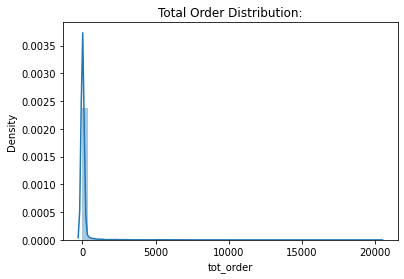

In [13]:
plt = sns.distplot(df['tot_order'].value_counts(), kde = True)
plt.set_title('Total Order Distribution:')

Conclusion:
    
Seems like most of Total Orer records are concentrated in low values to the right of zero, but the distribution is skewed to the right.. 

In [14]:
display(df[['quantity', 'unit_price', 'tot_order']].describe().T)
print()

# outliers: 
print('unit_price destribution')
display(df.stb.freq(['unit_price'], style = True, cum_cols = False))# cum_cols=false otherwiseit sum up the persentages
print('quantity destribution')
display(df.stb.freq(['quantity'], style = True, cum_cols = False))# cum_cols=false otherwiseit sum up the persentages


count       mean         std        min   25%   50%    75%  \
quantity    535187.0   9.671593  219.059056  -80995.00  1.00  3.00  10.00   
unit_price  535187.0   4.645242   97.364810  -11062.06  1.25  2.08   4.13   
tot_order   535187.0  18.173100  381.171824 -168469.60  3.75  9.90  17.40   

                 max  
quantity     80995.0  
unit_price   38970.0  
tot_order   168469.6


unit_price destribution


quantity destribution


Conclusion:

- There are records with UnitPrice<0 and Quantity<0. We need to remove them from the analysis.
- The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
- The UnitPrice also have few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.


In [15]:
# Lets run a quick filter for quantity-total_order outliers: 
print("quantity-total_order outliers(quantity > 1,000 and total order > 5,000) sample:")
quantity_total_order_outliers = df[(df['quantity'] > 1000) & (df['tot_order'] > 5000)]
display(quantity_total_order_outliers.sample(5))
print(f"There are {quantity_total_order_outliers.shape[0]} rows of them")
 

                                   
                                   
print("Looking for a specific outlier with total order of -168469.600000")
display(df[df['tot_order'] == -168469.600000] )# 2 only

# What about the unit price outliers? A look at the highest mean values bring up some suspect "products":
# DOTCOM POSTAGE
# CRUK Commission
# Manual
# Discount

df.groupby('description').mean()['unit_price'].nlargest()

# Let's examine postage related data in particular: 
# Creating a list of dotcome postage(/amazon) fee :
postage_dotcome_amazon_list = [
'dotcom sales','dotcom sold sets', 'postage', 'dotcom set', 'dotcom postage','sold as set/6 by dotcom','sold as set on dotcom','sold as set on dotcom and amazon',
'dotcome sales','sold as set on dotcom', 'sold as set on dotcom and amazon', 'sold as set by dotcom','sold as 1 on dotcom', 'dotcom adjust','allocate stock for dotcom orders ta',
'dotcom set','sold as set on dotcom','amazon sold sets','dotcom sold sets', 'sold as 1 on dotcom', 'dotcom sold sets',"dotcom sold in 6's", 're dotcom quick fix.',
'dotcomstock','dotcom adjust','rcvd be air temp fix for dotcom sit', 'amazon sold sets','amazon fee','amazon sales','amazon','amazon sold sets','amazon adjust', 
'amazon adjustment','sold as set on dotcom and amazon','sold as set on dotcom and amazon', 'ebay', 're dotcom quick fix.'
]
# Subseting df with those descriptions:
postage_dotcome_amazon_descriptions_df = df[df['description'].isin(postage_dotcome_amazon_list)]
print('Dotcome Postage/Amazon Fee related df row sample:')
display(postage_dotcome_amazon_descriptions_df.head(10))
print("Quantity values of Dotcome Postage/Amazon Fee related df:")
display(postage_dotcome_amazon_descriptions_df['quantity'])
print("Unit Price values of Dotcome Postage/Amazon Fee related df:")
display(df[df['description'] == 'dotcom postage']['unit_price'].describe())

# filter postage related descritions:  
df = df[~df['description'].isin(postage_dotcome_amazon_descriptions_df)]

# Now, let's examine 'CRUK Commission' - charity related data in particular: 
print('CRUK Commission -Charity related df rows:')
display(df[df['description'] == 'cruk commission'])

# Now, let's examine 'Manual' data in particular: 

# Creating list with manual related descriptions:

manual_damaged_products_related_list = [
                 'dotcom postage','thrown away-rusty','party bunting','wet/rusty','damages/dotcom?','on cargo order','smashed','wet damaged',
                 'water damaged','printing smudges/thrown away','to push order througha s stock was ','found some more on shelf','show samples',
                 'mix up with c', 'wrongly marked. 23343 in box','alan hodge cant mamage this section','fba','stock creditted wrongly','incorrectly put back into stock',
                 'manual','damages/samples','sold as 1 on dotcom','key fob , shed','key fob , back door ','code mix up? 84930','?display?','sold as 1',
                 '?missing','crushed ctn','test','temp adjustment','taig adjust','allocate stock for dotcom orders ta', '??','add stock to allocate online orders',
                 'for online retail orders','found box','oops ! adjustment','found in w/hse','website fixed','dagamed','historic computer difference?....se','incorrect stock entry.',
                 'michel oops', 'wrongly coded 20713','wrongly coded-23343','stock check','crushed boxes','wet/mouldy','wet/rusty','mailout',"can't find",'mouldy','wet pallet-thrown away',
                 'had been put aside.','sale error','wrongly marked 23343','20713 wrongly marked','re-adjustment','breakages','marked as 23343','20713',
                 'wrongly coded 23343','found by jackie','unsaleable, destroyed.','wrongly marked','had been put aside','damages wax',
                 'wrongly mrked had 85123a in box','wrongly marked carton 22804','missing?', 'wet rusty', '?lost', '?lost?', 'lost?',
                 'rusty thrown away','check?', '?? missing','wet pallet','????missing','lost in space','wet?', 'lost??','???','wet boxes',
                  '????damages????','mixed up','lost','given away','label mix up','samples/damages','thrown away','adjustment','wrongly sold as sets','wrongly sold sets',
                  '? sold as sets?', '?sold as sets?', 'thrown away.','damages/display',
                  'damaged stock','broken','throw away','wrong barcode (22467)','wrongly sold (22719) barcode','wrong barcode', 'barcode problem',
                  '?lost','found','faulty','?','check','damages','cracked','sold as 22467','sold in set?','damages?', 'key fob , front  door ',
                  'damages/display','damaged stock','broken','throw away','wrongly sold sets','? sold as sets?','?sold as sets?', 'wrongly sold as sets',
                  'amazon sold sets','samples/damages',  'label mix up', 'faulty','manual','amazon fee',
                  'bank charges','check', 'damages','samples', '?','discount','damages/showroom etc','adjust', 'crushed','returned','display',
                  'cracked','sold as 22467','incorrectly made-thrown away.', "thrown away-can't sell.", "thrown away-can't sell",
                  'wrongly sold sets','? sold as sets?','?sold as sets?', 'found','counted', 'returned', '???missing','mouldy, thrown away.', 'damaged' ,
                  'wet','missing','reverse 21/5/10 adjustment','damaged','reverse 21/5/10 adjustment',
                  'mouldy, thrown away.','showroom','mia','mystery! only ever imported 1800','merchant chandler credit error, sto','possible damages or lost?',
                  'display', 'missing','wrong code?','wrong code','damages/credits from asos.','reverse previous adjustment','incorrectly credited c550456 see 47',
                  'mouldy, unsaleable.','taig adjust no stock','???lost','sold with wrong barcode','rusty throw away','adjust bad debt','did  a credit  and did not tick ret',
                  'mailout ','dotcomstock','rcvd be air temp fix for dotcom sit'
]


# Subseting df with those descriptions:
manual_related_descriptions_df = df[df['description'].isin(manual_damaged_products_related_list)]
print('Dotcome Postage/Amazon Fee related df rows:')
display(manual_related_descriptions_df)
print ("Unit Price Manual related df")
display(manual_related_descriptions_df['unit_price'].describe())
print()
print("Manual related df rows with manual description and tot order above 3000")
display(manual_related_descriptions_df[manual_related_descriptions_df['tot_order'] > 3000])
print()

# filter manual related descritions:  
df = df[~df['description'].isin(manual_damaged_products_related_list)]

#  Delete all descriptions with '?':
bool_vec = ~df['description'].str.contains('?',na=False,regex=False)
#display(bool_vec)
#display(df.loc[bool_vec])
df = df.loc[bool_vec]

print ("Unit Price Discount related df")
display(df[df['description'] == 'discount']['unit_price'].describe())
print()

print("Discount related df rows:")
display(df[df['description'] == 'discount'])
print()

print("removed categories")
removed_cats = ['dotcom postage related', 'cruk commission', 'manual related']
display(removed_cats)
print()

quantity-total_order outliers(quantity > 1,000 and total order > 5,000) sample:


invoice_no stock_code                          description  quantity  \
159101     550461      21108   fairy cake flannel assorted colour      3114   
535160     581483      23843          paper craft , little birdie     80995   
52169      540815      21108   fairy cake flannel assorted colour      3114   
61006      541431      23166       medium ceramic top storage jar     74215   
345627     567423      23243  set of tea coffee sugar tins pantry      1412   

          invoice_datetime  unit_price  customer_id invoice_period  \
159101 2019-04-16 13:20:00        2.10      15749.0        2019-04   
535160 2019-12-07 09:15:00        2.08      16446.0        2019-12   
52169  2019-01-09 12:55:00        2.10      15749.0        2019-01   
61006  2019-01-16 10:01:00        1.04      12346.0        2019-01   
345627 2019-09-18 11:05:00        5.06      17450.0        2019-09   

       invoice_date  tot_order  
159101   2019-04-16    6539.40  
535160   2019-12-07  168469.60  
52169    2019-01-09    6539.40  
61006    2019-01-16   77183.60  
345627   2019-09-18    7144.72

There are 5 rows of them
Looking for a specific outlier with total order of -168469.600000


invoice_no stock_code                  description  quantity  \
535161    C581484      23843  paper craft , little birdie    -80995   

          invoice_datetime  unit_price  customer_id invoice_period  \
535161 2019-12-07 09:27:00        2.08      16446.0        2019-12   

       invoice_date  tot_order  
535161   2019-12-07  -168469.6

Dotcome Postage/Amazon Fee related df row sample:


invoice_no stock_code     description  quantity    invoice_datetime  \
45       536370       POST         postage         3 2018-11-29 08:45:00   
386      536403       POST         postage         1 2018-11-29 11:27:00   
1098     536527       POST         postage         1 2018-11-29 13:04:00   
1778     536544        DOT  dotcom postage         1 2018-11-29 14:32:00   
2997     536592        DOT  dotcom postage         1 2018-11-29 17:06:00   
4994     536840       POST         postage         1 2018-11-30 18:27:00   
5173     536852       POST         postage         1 2018-12-01 09:51:00   
5240     536858       POST         postage         2 2018-12-01 10:36:00   
5284     536861       POST         postage         3 2018-12-01 10:44:00   
5365     536862        DOT  dotcom postage         1 2018-12-01 11:13:00   

      unit_price  customer_id invoice_period invoice_date  tot_order  
45         18.00      12583.0        2018-11   2018-11-29      54.00  
386        15.00      12791.0        2018-11   2018-11-29      15.00  
1098       18.00      12662.0        2018-11   2018-11-29      18.00  
1778      569.77          NaN        2018-11   2018-11-29     569.77  
2997      607.49          NaN        2018-11   2018-11-29     607.49  
4994       18.00      12738.0        2018-11   2018-11-30      18.00  
5173       18.00      12686.0        2018-12   2018-12-01      18.00  
5240       40.00      13520.0        2018-12   2018-12-01      80.00  
5284       18.00      12427.0        2018-12   2018-12-01      54.00  
5365      254.43          NaN        2018-12   2018-12-01     254.43

Quantity values of Dotcome Postage/Amazon Fee related df:


45        3
386       1
1098      1
1778      1
2997      1
         ..
535955    2
536279    1
536462    1
536499    2
536500    3
Name: quantity, Length: 2057, dtype: int64

Unit Price values of Dotcome Postage/Amazon Fee related df:


count     709.000000
mean      290.905585
std       355.475166
min         0.000000
25%       131.420000
50%       184.960000
75%       264.650000
max      4505.170000
Name: unit_price, dtype: float64

CRUK Commission -Charity related df rows:


invoice_no stock_code      description  quantity    invoice_datetime  \
315033    C564763       CRUK  cruk commission        -1 2019-08-28 10:49:00   
321525    C565382       CRUK  cruk commission        -1 2019-08-31 15:45:00   
331207    C566216       CRUK  cruk commission        -1 2019-09-07 15:17:00   
336196    C566565       CRUK  cruk commission        -1 2019-09-11 12:32:00   
348282    C567655       CRUK  cruk commission        -1 2019-09-19 14:40:00   
358797    C568345       CRUK  cruk commission        -1 2019-09-24 15:28:00   
369907    C569245       CRUK  cruk commission        -1 2019-10-01 09:57:00   
386875    C570487       CRUK  cruk commission        -1 2019-10-08 17:12:00   
398522    C571440       CRUK  cruk commission        -1 2019-10-15 13:31:00   
413019    C572551       CRUK  cruk commission        -1 2019-10-22 17:07:00   
426375    C573575       CRUK  cruk commission        -1 2019-10-29 14:09:00   
451291    C575606       CRUK  cruk commission        -1 2019-11-08 12:37:00   
463273    C576338       CRUK  cruk commission        -1 2019-11-12 15:27:00   
490139    C578269       CRUK  cruk commission        -1 2019-11-21 13:39:00   
503664    C579195       CRUK  cruk commission        -1 2019-11-26 15:54:00   
522945    C580726       CRUK  cruk commission        -1 2019-12-03 17:17:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
315033        1.60      14096.0        2019-08   2019-08-28      -1.60  
321525       13.01      14096.0        2019-08   2019-08-31     -13.01  
331207       15.96      14096.0        2019-09   2019-09-07     -15.96  
336196       52.24      14096.0        2019-09   2019-09-11     -52.24  
348282      608.66      14096.0        2019-09   2019-09-19    -608.66  
358797      447.56      14096.0        2019-09   2019-09-24    -447.56  
369907      361.59      14096.0        2019-10   2019-10-01    -361.59  
386875      411.92      14096.0        2019-10   2019-10-08    -411.92  
398522      495.98      14096.0        2019-10   2019-10-15    -495.98  
413019      425.14      14096.0        2019-10   2019-10-22    -425.14  
426375      606.00      14096.0        2019-10   2019-10-29    -606.00  
451291      517.51      14096.0        2019-11   2019-11-08    -517.51  
463273     1038.75      14096.0        2019-11   2019-11-12   -1038.75  
490139      849.93      14096.0        2019-11   2019-11-21    -849.93  
503664      987.14      14096.0        2019-11   2019-11-26    -987.14  
522945     1100.44      14096.0        2019-12   2019-12-03   -1100.44

Dotcome Postage/Amazon Fee related df rows:


invoice_no stock_code             description  quantity  \
141       C536379          D                discount        -1   
1778       536544        DOT          dotcom postage         1   
2195       536569          M                  manual         1   
2206       536569          M                  manual         1   
2997       536592        DOT          dotcom postage         1   
...           ...        ...                     ...       ...   
535421     581492      21902  key fob , front  door          1   
535647     581492        DOT          dotcom postage         1   
536057     581497      47566           party bunting         5   
536279     581498        DOT          dotcom postage         1   
536280    C581499          M                  manual        -1   

          invoice_datetime  unit_price  customer_id invoice_period  \
141    2018-11-29 09:41:00       27.50      14527.0        2018-11   
1778   2018-11-29 14:32:00      569.77          NaN        2018-11   
2195   2018-11-29 15:35:00        1.25      16274.0        2018-11   
2206   2018-11-29 15:35:00       18.95      16274.0        2018-11   
2997   2018-11-29 17:06:00      607.49          NaN        2018-11   
...                    ...         ...          ...            ...   
535421 2019-12-07 10:03:00        1.63          NaN        2019-12   
535647 2019-12-07 10:03:00      933.17          NaN        2019-12   
536057 2019-12-07 10:23:00       10.79          NaN        2019-12   
536279 2019-12-07 10:26:00     1714.17          NaN        2019-12   
536280 2019-12-07 10:28:00      224.69      15498.0        2019-12   

       invoice_date  tot_order  
141      2018-11-29     -27.50  
1778     2018-11-29     569.77  
2195     2018-11-29       1.25  
2206     2018-11-29      18.95  
2997     2018-11-29     607.49  
...             ...        ...  
535421   2019-12-07       1.63  
535647   2019-12-07     933.17  
536057   2019-12-07      53.95  
536279   2019-12-07    1714.17  
536280   2019-12-07    -224.69  

[4687 rows x 10 columns]

Unit Price Manual related df


count     4687.000000
mean       146.298771
std       1014.906516
min     -11062.060000
25%          0.650000
50%          4.950000
75%         10.790000
max      38970.000000
Name: unit_price, dtype: float64


Manual related df rows with manual description and tot order above 3000


invoice_no stock_code      description  quantity    invoice_datetime  \
14757      537632  AMAZONFEE       amazon fee         1 2018-12-05 15:08:00   
265857     560373          M           manual         1 2019-07-16 12:30:00   
295392     562955        DOT   dotcom postage         1 2019-08-09 10:14:00   
297645    A563185          B  adjust bad debt         1 2019-08-10 14:50:00   
371642     569382          M           manual         1 2019-10-01 16:44:00   
403134     571751          M           manual         1 2019-10-17 11:18:00   
418831     573077          M           manual         1 2019-10-25 14:13:00   
418856     573080          M           manual         1 2019-10-25 14:20:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  
14757     13541.33          NaN        2018-12   2018-12-05   13541.33  
265857     4287.63          NaN        2019-07   2019-07-16    4287.63  
295392     4505.17          NaN        2019-08   2019-08-09    4505.17  
297645    11062.06          NaN        2019-08   2019-08-10   11062.06  
371642     3155.95      15502.0        2019-10   2019-10-01    3155.95  
403134     3949.32      12744.0        2019-10   2019-10-17    3949.32  
418831     4161.06      12536.0        2019-10   2019-10-25    4161.06  
418856     4161.06      12536.0        2019-10   2019-10-25    4161.06


Unit Price Discount related df


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: unit_price, dtype: float64


Discount related df rows:


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order]
Index: []


removed categories


['dotcom postage related', 'cruk commission', 'manual related']

Conclusion:

Outliers: 
Some outliers have been detected in unit_price and quantity columns that should be treated to prevent any destortion in the analysis results later on. 

By running a quick filter, we see that the outliers (5 only) mostly lie in small ticket items that cost around 1-2 pounds each. 
The most obvious outlier would be invoice number 581483. 
It seems that someone really really likes crafted paper birdies. Or... after looking for the same negative value for total order and the same (but negative) quantity of the same stock_code with 'paper craft , little birdie' was indeed detected. 

Judging by this cancellation, maybe not so much ...

There doesn't seem to be any other entries within the outliers to suggest skewing the sales history especially when some of the largest tickets were all cancelled.

 - 'DOTCOM POSTAGE'/'DOTCOME','AMAZON' related descriptions seems to indicate the amount spent by the customer on postage. With an average of 709, this is over 200 times the average unit price of all products. 
   Furthermore, postage isn't a direct indicator of sales and might skew the amount spent across cohorts. (There also seems to be a similar label containg 'POSTAGE' or wlse which we will remove as well.)

 - 'CRUK Commission' sounded like a fee paid out to an external organization and a quick google search turned up related results at Cancer Research UK. 
    This might be part of an initiative to pay out some proceeds to the cancer research effort. As this isn't directly related to sales, we should drop 'CRUK Commission' rows.
    (Looking up on line I figure that 'Cancer Research UK' (CRUK) is the world's largest independent cancer research organization. It is registered as a charity in the United Kingdom.)
    
 - 'Manual' is a product that is rather nebulous. There are 567 records of Manual, with a single record commanding an average unit price of 72.48. 
    As we do not have specific information regarding the operations of this online retail company, perhaps 'Manual' refers to manual services rendered with the purchase of other items. 
   This could be the setting up of chandeliers or the shelves in a warehouse. 
   As there are significant outliers for these transactions that do not directly tie to individual product sales, we will drop 'Manual' records too.

- 'Discount' seems to be a rather self explanatory category for discounts offered for products sold. 
   This is further corroborated by the fact that all these transactions have negative sales quantities. 
   As discounts directly tie into the price of products and impact sales directly, we will leave it in the dataframe.

In [16]:
# Now let's deal with other possible problems in product names (description column):
# function for dealind with prefix in invoice_no that means "canceled":

df['is_refund']=df['invoice_no'].apply(lambda x: True if "C" in x else False )
refunds_df_cancelations =df[df['is_refund']]
display(df[df['is_refund']].info())# 8787 rows of  refunds - to be droped (less then 2%)
display(df[df['is_refund']].sample(5))
display(any(df[df['is_refund']]['quantity'].values>0))# False

# I have tried to make a function to look for "pairs" for refunds (delete the purchase but it didn't work I couldnt distingwish the purchases)

df = df[df['is_refund']==False]
df.info()# 521713  rows now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 154 to 536449
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   invoice_no        8787 non-null   object        
 1   stock_code        8787 non-null   object        
 2   description       8787 non-null   object        
 3   quantity          8787 non-null   int64         
 4   invoice_datetime  8787 non-null   datetime64[ns]
 5   unit_price        8787 non-null   float64       
 6   customer_id       8597 non-null   float64       
 7   invoice_period    8787 non-null   object        
 8   invoice_date      8787 non-null   datetime64[ns]
 9   tot_order         8787 non-null   float64       
 10  is_refund         8787 non-null   bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 763.7+ KB


None

invoice_no stock_code                         description  quantity  \
514846    C580179      22972             children's spaceboy mug        -1   
207472    C555196      20970  pink floral feltcraft shoulder bag        -1   
43797     C540164      22939                 apron apple delight        -2   
410624    C572334      23344           jumbo bag 50's christmas       -100   
534831    C581466      21232      strawberry ceramic trinket pot        -1   

          invoice_datetime  unit_price  customer_id invoice_period  \
514846 2019-11-30 11:58:00        1.65      13352.0        2019-11   
207472 2019-05-30 11:40:00        3.75      14606.0        2019-05   
43797  2019-01-03 12:02:00        4.95      14911.0        2019-01   
410624 2019-10-22 10:25:00        1.79      14607.0        2019-10   
534831 2019-12-06 19:20:00        1.25      13883.0        2019-12   

       invoice_date  tot_order  is_refund  
514846   2019-11-30      -1.65       True  
207472   2019-05-30      -3.75       True  
43797    2019-01-03      -9.90       True  
410624   2019-10-22    -179.00       True  
534831   2019-12-06      -1.25       True

False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521713 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        521713 non-null  object        
 1   stock_code        521713 non-null  object        
 2   description       521713 non-null  object        
 3   quantity          521713 non-null  int64         
 4   invoice_datetime  521713 non-null  datetime64[ns]
 5   unit_price        521713 non-null  float64       
 6   customer_id       390358 non-null  float64       
 7   invoice_period    521713 non-null  object        
 8   invoice_date      521713 non-null  datetime64[ns]
 9   tot_order         521713 non-null  float64       
 10  is_refund         521713 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.3+ MB


Conclusion:

products with invoice number that has prefix "C" seems to be shorts for "canceled" or "cancelation" and perhaps do not represents sales. There are 8787 rows of refunds like those - to be droped (with minor shaer - less then 2% of the data)
Moreover their quantity is negative and that also point out the same fact.

Those rows should be ommitted from data. 

Conclusion:
    
Descriptions with quastion marks probably do not represents sales and should be deleted from the data. (their share is minor)    

In [17]:
problematic_descriptions_list = ['dotcom postage',
                 'not rcvd in 10/11/2010 delivery',
                 'thrown away-rusty',
                 'party bunting',
                 'sold as set/6 by dotcom',
                 'wet/rusty',
                 'damages/dotcom?',
                 'on cargo order',
                 'smashed',
                 'wet damaged',
                 'water damaged',
                 'sold as set on dotcom',
                 'sold as set on dotcom and amazon',
                 'water damage',
                 'sold as set on dotcom',
                 'sold as set on dotcom and amazon',
                 'sold as set by dotcom',
                 'printing smudges/thrown away',
                 'to push order througha s stock was ',
                 'found some more on shelf',
                  'show samples',
                  'mix up with c', 
                  'wrongly marked. 23343 in box',
                  'alan hodge cant mamage this section',
                  'fba',
                  'stock creditted wrongly',
                  'incorrectly put back into stock',
                  'ebay',
                  'manual',
                  'damages/samples',
                  'sold as 1 on dotcom',
                  'key fob , shed',
                  'key fob , back door ',
                  'code mix up? 84930',
                  '?display?',
                  'sold as 1',
                  '?missing',
                  'crushed ctn',
                  'test',
                  'temp adjustment',
                  'taig adjust',
                  'allocate stock for dotcom orders ta',
                   '??',
                  'add stock to allocate online orders',
                  'for online retail orders',
                  'found box','oops ! adjustment',
                  'found in w/hse',
                  'website fixed',
                  'dagamed',
                  'historic computer difference?....se',
                   'incorrect stock entry.',
                   'michel oops',
                   'wrongly coded 20713',
                   'wrongly coded-23343',
                   'stock check',
                   'crushed boxes',
                   'wet/mouldy',
                   'wet/rusty',
                   'mailout',
                   "can't find",
                   'mouldy',
                   'wet pallet-thrown away',
                   'had been put aside.',
                   'sale error',
                   'amazon adjustment',
                   'wrongly marked 23343',
                   '20713 wrongly marked',
                   're-adjustment',
                   'breakages',
                   'marked as 23343',
                   '20713',
                   'wrongly coded 23343',
                   'found by jackie',
                   'unsaleable, destroyed.',
                   'wrongly marked',
                   'had been put aside','damages wax',
                   'wrongly mrked had 85123a in box',
                   'wrongly marked carton 22804',
                   'missing?',
                   'wet rusty',
                   'amazon adjust',
                   '?lost', 
                   '?lost?', 
                   'lost?',
                   'dotcom adjust',
                   'rusty thrown away',
                   'check?',
                   '?? missing',
                   'wet pallet',
                    '????missing',
                    'lost in space',
                    'wet?',
                    'lost??',
                    '???',
                    'wet boxes',
                    '????damages????',
                    'mixed up',
                    'lost',
                    'given away',
                    'dotcom',
                    'label mix up',
                    'samples/damages',
                    'thrown away',
                    'adjustment',
                    'dotcom set',
                    'wrongly sold as sets',
                    'amazon sold sets',
                    'dotcom sold sets',
                    'wrongly sold sets',
                    '? sold as sets?',
                    '?sold as sets?',
                    'thrown away.',
                    'damages/display',
                    'damaged stock',
                    'broken',
                    'throw away','wrong barcode (22467)',
                    'wrongly sold (22719) barcode',
                    'wrong barcode',
                    'barcode problem',
                    '?lost','found','faulty','dotcom sales',
                    'amazon sales','amazon',
                    '?','check','damages','cracked',
                    'sold as 22467', "dotcom sold in 6's",
                    'sold in set?',
                    'damages?', 
                    'key fob , front  door ',
                    'damages/display',
                    'damaged stock',
                    'broken',
                    'throw away',
                    'wrongly sold sets',
                    '? sold as sets?',
                    '?sold as sets?',
                    'dotcom set',
                    'wrongly sold as sets',
                    'amazon sold sets',
                    'dotcom sold sets',
                    'samples/damages',  
                    'label mix up',
                    'dotcom',
                    'dotcom sales', 
                    'faulty',
                    'manual',
                    'amazon fee',
                    'bank charges', 
                    'check',
                    'damages',
                    'samples', 
                    'postage', 
                    '?',
                    'discount',
                    'damages/showroom etc',
                    'adjust',
                    'crushed',
                    'returned',
                    'display',
                    'cracked',
                    'sold as 22467',
                    'incorrectly made-thrown away.',
                     "thrown away-can't sell.",
                     "thrown away-can't sell",
                    'wrongly sold sets',
                    '? sold as sets?',
                    '?sold as sets?', 
                    'found',
                    'counted', 
                    'returned',
                    '???missing',
                    'mouldy, thrown away.',
                    'damaged' ,
                    'wet',
                    'missing',            
                    'reverse 21/5/10 adjustment',
                    'damaged',
                    'reverse 21/5/10 adjustment',
                     'mouldy, thrown away.',
                     'showroom',
                     'mia',
                     're dotcom quick fix.',
                     'mystery! only ever imported 1800',
                     'merchant chandler credit error, sto',
                     'possible damages or lost?',
                     'display',
                     'missing',
                     'wrong code?',
                     'wrong code',
                     'damages/credits from asos.',
                     'reverse previous adjustment',
                     'incorrectly credited c550456 see 47',
                     'mouldy, unsaleable.',
                     'taig adjust no stock',
                     '???lost',
                     'sold with wrong barcode',
                     'rusty throw away',
                     'adjust bad debt',
                     'did  a credit  and did not tick ret',
                     'mailout ','dotcomstock',
                     'rcvd be air temp fix for dotcom sit']

problematic_descriptions_df = df[df['description'].isin(problematic_descriptions_list)]
display(problematic_descriptions_df.sample(5))
print("problematic_descriptions quantiry values:")
display(problematic_descriptions_df['quantity'])
# filter descritions:  
df_new = df[~df['description'].isin(problematic_descriptions_list)]
df_new.info() # 534521
print()

# check the share of the lost..
print('unfiltered data:')
print(len(df))
print('filltered data:')
print(len(df_new))
print('Share of lost data:')
print(round(100-len(df_new)/len(df)*100,1),'%' )        
df = df_new    

invoice_no stock_code description  quantity    invoice_datetime  \
529579     581171       POST     postage         2 2019-12-05 15:02:00   
320573     565239       POST     postage         3 2019-08-31 09:51:00   
51827      540769       POST     postage         1 2019-01-09 10:38:00   
173490     551868       POST     postage         8 2019-05-02 16:29:00   
67618      541857       POST     postage         6 2019-01-21 15:17:00   

        unit_price  customer_id invoice_period invoice_date  tot_order  \
529579        18.0      12615.0        2019-12   2019-12-05       36.0   
320573        18.0      12670.0        2019-08   2019-08-31       54.0   
51827         18.0      12601.0        2019-01   2019-01-09       18.0   
173490        28.0      12540.0        2019-05   2019-05-02      224.0   
67618         18.0      12727.0        2019-01   2019-01-21      108.0   

        is_refund  
529579      False  
320573      False  
51827       False  
173490      False  
67618       False

problematic_descriptions quantiry values:


45        3
386       1
1098      1
4994      1
5173      1
         ..
535937    1
535955    2
536462    1
536499    2
536500    3
Name: quantity, Length: 1192, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520521 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520521 non-null  object        
 1   stock_code        520521 non-null  object        
 2   description       520521 non-null  object        
 3   quantity          520521 non-null  int64         
 4   invoice_datetime  520521 non-null  datetime64[ns]
 5   unit_price        520521 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520521 non-null  object        
 8   invoice_date      520521 non-null  datetime64[ns]
 9   tot_order         520521 non-null  float64       
 10  is_refund         520521 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB

unfiltered data:
521713
filltered data:
520521
Share of lost data:
0.2 %


Conclusion:

Bad debt adjustments together with other suspicious item names should be dropped from the dataset as these do not represent actual sales. 

Note: their share is only 2% of the data.

In [20]:
print('negative quantity:') # 9762  neg
neg_quantity_df = df.query('quantity < 0')
print(neg_quantity_df.shape[0], "rows")
#display(neg_quantity_df.sample(5))# 9762 neg

print('zero quantity:')
display(df.query('quantity == 0'))# no zero quantity 
print()


print('negative/zero price :')
neg_zero_unit_price_df = df.query('unit_price < 0 or unit_price ==0') # only 409 rows - zero unit price
print(neg_zero_unit_price_df.shape[0], "rows")
display(neg_zero_unit_price_df.sample(5))
#display(list(neg_zero_unit_price_df['description'].unique()))


# No more quantity zero or netative!!!!!!!!!!!!


display(df[df['unit_price']==0]['stock_code'].nunique()) # 192 unique stock code when 'unit_price' is zero and need to be corrected with zero 

print(df[df['unit_price']==0].shape[0], "rows with zero values") # 2515 rows with zero values .. 
display(df[df['unit_price']==0].sample(5))

negative quantity:
0 rows
zero quantity:


Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_datetime, unit_price, customer_id, invoice_period, invoice_date, tot_order, is_refund]
Index: []


negative/zero price :
409 rows


invoice_no stock_code                    description  quantity  \
191951     553539      22426         enamel wash bowl cream         1   
191581     553521      22514       childs garden spade blue         2   
103460     545176      37333           retro "tea for one"          3   
311229     564530      22627            mint kitchen scales         3   
122907     546933      22681  french blue metal door sign 6         7   

          invoice_datetime  unit_price  customer_id invoice_period  \
191951 2019-05-15 15:27:00         0.0          NaN        2019-05   
191581 2019-05-15 14:35:00         0.0          NaN        2019-05   
103460 2019-02-26 14:19:00         0.0          NaN        2019-02   
311229 2019-08-23 14:57:00         0.0          NaN        2019-08   
122907 2019-03-16 11:02:00         0.0          NaN        2019-03   

       invoice_date  tot_order  is_refund  
191951   2019-05-15        0.0      False  
191581   2019-05-15        0.0      False  
103460   2019-02-26        0.0      False  
311229   2019-08-23        0.0      False  
122907   2019-03-16        0.0      False

192

409 rows with zero values


invoice_no stock_code                          description  quantity  \
191572     553521      22645  ceramic heart fairy cake money bank         1   
52821      540832      84692          box of 24 cocktail parasols         1   
40952      539856     84968E      set of 16 vintage black cutlery         1   
14102      537534      22474              spaceboy tv dinner tray         1   
14109      537534      22376    airline bag vintage jet set white         1   

          invoice_datetime  unit_price  customer_id invoice_period  \
191572 2019-05-15 14:35:00         0.0          NaN        2019-05   
52821  2019-01-09 14:42:00         0.0          NaN        2019-01   
40952  2018-12-20 14:41:00         0.0          NaN        2018-12   
14102  2018-12-05 11:48:00         0.0          NaN        2018-12   
14109  2018-12-05 11:48:00         0.0          NaN        2018-12   

       invoice_date  tot_order  is_refund  
191572   2019-05-15        0.0      False  
52821    2019-01-09        0.0      False  
40952    2018-12-20        0.0      False  
14102    2018-12-05        0.0      False  
14109    2018-12-05        0.0      False

    - The min and max value for Quantity is 80995, this could represent cancelled or returned orders.
    - The UnitPrice also have few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.
    - Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.


Removing the negative values from UnitPrice and Quantity:
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
#Removing the Null values from the data.
df = df[pd.notnull(df['CustomerID'])]

Cleaning the Date Column:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [21]:
# Dealing with negative/zero values in the data frame: 

# , so first, treat 0 values as missing - nan then..
df.loc[(df['unit_price'] == 0), 'unit_price'] = np.nan
#df.info() # 2515 'unit_price' rows are null now. (all zeroes indeed)
# Then, it is possible to use 'fillna' methods:

#df_single_products = df[df['quantity'] == 1]
df_new = df.copy()
df['unit_price'] = df.groupby(['stock_code'])['unit_price'].transform(lambda grp: grp.fillna(grp.mode()))
display(df['unit_price'])
display(df.info())
# the rest - complete with median :
df['unit_price'] = df.groupby(['stock_code'])['unit_price'].transform(lambda grp: grp.fillna(grp.median()))
display(df.info())# only 1 without unit_price now:
#display(df[df['unit_price'].isnull()]) # study them . look at their descriptions - they are all defected products that cannot be sell . 
# lets dropthem from df:
df.dropna(subset= ['unit_price'], inplace=True)
df.info() # from now on we continue the analysis with  540434 rows !!


0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
536636    0.85
536637    2.10
536638    4.15
536639    4.15
536640    4.95
Name: unit_price, Length: 520521, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520521 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520521 non-null  object        
 1   stock_code        520521 non-null  object        
 2   description       520521 non-null  object        
 3   quantity          520521 non-null  int64         
 4   invoice_datetime  520521 non-null  datetime64[ns]
 5   unit_price        520112 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520521 non-null  object        
 8   invoice_date      520521 non-null  datetime64[ns]
 9   tot_order         520521 non-null  float64       
 10  is_refund         520521 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520521 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520521 non-null  object        
 1   stock_code        520521 non-null  object        
 2   description       520521 non-null  object        
 3   quantity          520521 non-null  int64         
 4   invoice_datetime  520521 non-null  datetime64[ns]
 5   unit_price        520520 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520521 non-null  object        
 8   invoice_date      520521 non-null  datetime64[ns]
 9   tot_order         520521 non-null  float64       
 10  is_refund         520521 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520520 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        520520 non-null  object        
 1   stock_code        520520 non-null  object        
 2   description       520520 non-null  object        
 3   quantity          520520 non-null  int64         
 4   invoice_datetime  520520 non-null  datetime64[ns]
 5   unit_price        520520 non-null  float64       
 6   customer_id       389259 non-null  float64       
 7   invoice_period    520520 non-null  object        
 8   invoice_date      520520 non-null  datetime64[ns]
 9   tot_order         520520 non-null  float64       
 10  is_refund         520520 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 44.2+ MB


<b id="-color">

### Trying to find color and size traits out of product names:       

In [22]:
# Trying to analize color and size traits for the product:

#Creating color list
colors_list = ['red', 'rose','yellow', 'green', 'pink', 'blue', 'ivory', 'purple', 'white','black', 'silver', 'gold', 'turquoise' ,'color','brown','grey', 'gray' , 'orange', 'violet','colour','light' , 'dark' , 'pastel','black/blue','blue/green' , 'yellow/pink' ,'pink/white','pink/purple','pink/blue', ' silver/black', 'white/pink', 'black+white']
# , '``', '*'
        
def get_color(desc):
    for word in desc.split():
        if word in colors_list:
            #print("%s in string" % word)
            #print( word)
            return word
        return 'undefined'

# Creating size list:
size_list = ['large', 'small', 'mini', 'medium', 'size' ,'grand', 'giant', 'jumbo', 'cm', 'kg' ,'set']

def get_size(desc):
    for word in desc.split():
        if word in size_list:
            #print("%s in string" % word)
            #print( word)
            return word
        return 'undefined'

# Add color and size columns :
df['color'] = df['description'].apply(get_color)    
display(df.stb.freq(['color'], style = True, cum_cols = False))
df['size'] = df['description'].apply(get_size)    
display(df.stb.freq(['size'], style = True, cum_cols = False))

# It terned out that most of the descriptions lacks of those new traits so.. delete those rows of the data 
df.drop("size", inplace=True, axis = 1)
df.drop("color", inplace=True, axis = 1)

Conclusion:

After trying to find product traits as size and colors, it terned out that:

color: 88.42% (461,350 in number) of the descriptions color column values are undefined.

size: 86.85% (452,050 in number) of the descriptions color column values are undefined.

So, delete those new columns from the data.. (but, using the lists later for the corpus)

<b id="-Analysis"> 2.

## Product Description Analysis:

   * Create a corpus out of product descriptions.
   * Clean up the corpus and removed stopwords etc, Eliminate grammatical variations via stemming
   * Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix.
   * Clculate from the TF-IDF the corpus distance matrix comparing the relative similarity.
   * Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined 
   * Using Kmean to form the clusters
   * Study the term frequencies for each cluster.
   * Based on the term frequencies, identify product category keywords for each cluster.
   * Categorizing the products in the store differently in order to get result that enable better understanding of product range. 
   * Calculating monthly revenue and monthly cumulating revenue to detect the trend
   * Splitting products by category and finding: 1. the leading categories regarding the number of items in each category 2. the leading categories in sales
   * Finding the top ten selling products
   * Examining Refunds: by total amount and by frequency)
      
    

<b id="-corpus">    

### Create a corpus out of product descriptions.

In [23]:
# Make a copy in order to create a list of description for a corpus:

description_df = df['description'].drop_duplicates().to_frame()
display(description_df.sample(10))


description
188420   gardeners kneeling pad cup of tea 
2990           crystal diamante star brooch
769                pink sweetheart bracelet
521930            letter "u" bling key ring
172           traditional christmas ribbons
86077        square metal candleholder base
13656      pink glass chunky charm bracelet
376740  set 10 cards christmas holly  17259
1181                       wrap red apples 
226             set/6 red spotty paper cups

<b id="-clean">

### Clean up the corpus and removed stopwords etc, Eliminate grammatical variations via stemming:

Stopwords, stemming, and tokenizing:

This section focused on defining some functions to manipulate the synopses. First, I load NLTK's list of English stop words. Stop words are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [24]:
# Remove non-words from corpus

def remove_not_words(desc):
    desc = re.sub(r'[^\w]',' ', desc)
    pattern = '[0-99]' 
    desc = re.sub(pattern,'', desc)
    # delete single letters from description strings:
    desc = ' '.join( [w for w in desc.split() if len(w)>1] )
    return desc
    
description_df['filtered_corpus'] = description_df['description'].apply(remove_not_words)
display(description_df.sample(5))



# Cleaning description list from stopwords
stop_words = set(stopwords.words('english')) 

def remove_stop_words(desc):
    word_tokens = word_tokenize(desc)
    desc =  ' '.join([w for w in word_tokens if not w.lower() in stop_words])
    return desc
    
description_df['filtered_corpus'] = description_df['filtered_corpus'].apply(remove_stop_words)
display(description_df.sample(5))


def remove_size_color(desc):    
    desc =  ' '.join([word for word in desc.split() if (word not in size_list and word not in colors_list )])
    return desc

description_df['filtered_corpus'] = description_df['filtered_corpus'].apply(remove_size_color)
display(description_df.sample(5))


# lemmetizing the corpus in order to converts the word to its meaningful base form, 
# which is called Lemma . Thats allow us to get rid of plorals etc. 

wnl = nltk.WordNetLemmatizer()

def lemmatize(desc):
    desc = ' '.join([wnl.lemmatize(word) for word in nltk.wordpunct_tokenize(desc)])
    return desc
   
description_df['filtered_corpus'] = description_df['filtered_corpus'].apply(lemmatize)
display(description_df.sample(5))    


description                filtered_corpus
3055    set/4 garden rose dinner candle  set garden rose dinner candle
1557    set of 2 tins vintage bathroom    set of tins vintage bathroom
548                blue polkadot plate             blue polkadot plate
185162      miseltoe heart wreath white    miseltoe heart wreath white
497479    gin and tonic diet metal sign  gin and tonic diet metal sign

description              filtered_corpus
4050    lily brooch amethyst colour  lily brooch amethyst colour
11517      toxic area  door hanger        toxic area door hanger
37555        easter craft 4 chicks           easter craft chicks
371516        wall art dog licence          wall art dog licence
678     grey heart hot water bottle  grey heart hot water bottle

description            filtered_corpus
11031        bird decoration green polkadot   bird decoration polkadot
221669             pink vintage spot beaker        vintage spot beaker
1887          red retrospot round cake tins  retrospot round cake tins
3317    white spot blue ceramic drawer knob   spot ceramic drawer knob
3008                   red retrospot purse             retrospot purse

description                 filtered_corpus
366508  heart trellistriple t-light holder      heart trellistriple holder
16900      purple las vegas bracelet round          la vega bracelet round
15799             doorstop football design        doorstop football design
168355           blue stripes shoulder bag             stripe shoulder bag
106077      buffalo bill treasure book box  buffalo bill treasure book box

Conclusion:

Now the corpus is ready for use. 

<b id="-tfidf">    

### Create a Term-Frequency Inverse Document Frequency (TF-IDF) matrix

In [25]:
# Create the Term-Frequency Inverse Document Frequency (TF-IDF) matrix 

final_corpus = list(description_df['filtered_corpus'])
display(final_corpus)
tfidf = TfidfVectorizer(stop_words='english',
                                 use_idf=True, ngram_range=(1,1)) # stop_words='english'
tfidf_matrix = tfidf.fit_transform(final_corpus)  # (corpus_list)

print(tfidf_matrix.shape) 

display(len(final_corpus))

terms = tfidf.get_feature_names() 


['hanging heart holder',
 'metal lantern',
 'cream cupid heart coat hanger',
 'knitted union flag hot water bottle',
 'woolly hottie heart',
 'babushka nesting box',
 'glass star frosted holder',
 'hand warmer union jack',
 'hand warmer polka dot',
 'assorted bird ornament',
 'poppy playhouse bedroom',
 'poppy playhouse kitchen',
 'feltcraft princess charlotte doll',
 'knitted mug cosy',
 'box assorted teaspoon',
 'box vintage jigsaw block',
 'box vintage alphabet block',
 'home building block word',
 'love building block word',
 'recipe box metal heart',
 'doormat new england',
 'jam making jar',
 'coat rack paris fashion',
 'coat rack paris fashion',
 'coat rack paris fashion',
 'bath building block word',
 'alarm clock bakelike',
 'alarm clock bakelike',
 'alarm clock bakelike',
 'panda bunny sticker sheet',
 'star gift tape',
 'inflatable political globe',
 'vintage head tail card game',
 'retrospot tea towel',
 'round snack box woodland',
 'spaceboy lunch box',
 'lunch box love lo

(4018, 1746)


4018

<b id="-distance">

### Calculate from the TF-IDF the corpus distance matrix comparing the relative similarity.

In [26]:
# crating distance matrix : use tf idf for clustering:

dist = pairwise_distances(tfidf_matrix, Y=None, metric = 'cosine')

<b id="-dendrogram">

### Use the distance matrix to build a dendrogram from which the number of clusters will be detrmined:

In [27]:
import matplotlib.pyplot as plt
# build a dendrogram from which the number of clusters will be detrmined
linked = linkage(dist, method='ward') #  metric='correlation',method = 'ward',
#The variable linked stores the table with the linked bundles of objects. It can be visualized as a dendrogram:
plt.figure(figsize=(15, 10))  
dendrogram(linked,  orientation="top")# orientation='top',
plt.title('Hierarchical Text clustering for Product Description')
plt.show() 

C:\Users\Gome\AppData\Local\Temp/ipykernel_23804/1825490988.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



<b id="-kmean">

### Using Kmean to form the clusters:

In [28]:
# define the k_means model with 5 clusters

n_clusters = 5
km =  KMeans(n_clusters = n_clusters, random_state = 1) # setting the number of clusters as 5
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(tfidf_matrix)  # applying the algorithm to the data and forming a cluster vector 

# store cluster labels in the field of our dataset

description_df['cluster_km'] = labels
#display(x_sc[1,:])

In [29]:
print()
cluster_desc_grouped_df = description_df.groupby(['cluster_km'])['filtered_corpus'].unique().to_frame()
print()

cluster_desc_grouped_df.reset_index(inplace=True)
#display(cluster_desc_grouped_df)

# Now , to add the groups to event table :Let's create a dictionary with pair: user-group and then add it to events_clean:
cluster_desc_dict = dict(zip(cluster_desc_grouped_df.cluster_km, cluster_desc_grouped_df.filtered_corpus))


<b id="-terms_freq">

### Study the term frequencies for each cluster:

In [30]:
# now we calculate the frequency of terms in each cluster to try to categorize the clusters

cluster_term_frequency = 0*tfidf_matrix[:n_clusters,:]

#display(tfidf_cluster_score.toarray())

display(tfidf_matrix.shape[1])

for row_index in range(tfidf_matrix.shape[0]):
    cluster = labels[row_index]
    cluster_term_frequency[cluster,:] += tfidf_matrix[row_index,:]>0


1746

C:\Users\Gome\anaconda3\lib\site-packages\scipy\sparse\_index.py:116: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [31]:
# Study the terms frequencies for each cluster:
  
### Based on the term frequencies, identify product category keywords for each cluster.
cluster_terms_dict = {}

for cluster in range(cluster_term_frequency.shape[0]):
    # create a list of values containing the terms belong to each clusrt (and locate it in the dict)
    cluster_terms_list = []
    # Sort each of the cluster's tfidf scores row:
    cluster_term_frequency_sort_ind = np.argsort(cluster_term_frequency[cluster,:].toarray())
    # Use the sorted items indices to sort the cluster term list:
    for term_ind in reversed(cluster_term_frequency_sort_ind[0]):
        # Choose only terms with tf > 0 (the term frequency is greater than zero):
        if cluster_term_frequency[cluster,term_ind]>0:
            # Add the term to an empty ranked term list 
            term = terms[term_ind]
            cluster_terms_list.append(term) 
    # Join all term lists to a dictionary: 
    cluster_terms_dict[cluster] = cluster_terms_list
        

        
# print the first value of dict:        
for key in cluster_terms_dict.keys():
    print('cluster ', key, ' keywords:')
    print()
    print(' '.join(cluster_terms_dict[key][:7]))
    print()


cluster  0  keywords:

box candle flower bag card design christmas

cluster  1  keywords:

paper star lantern christmas point holder garland

cluster  2  keywords:

vintage bag christmas doily tin leaf paisley

cluster  3  keywords:

glass bracelet bead necklace jar charm bag

cluster  4  keywords:

heart decoration hanging holder love zinc beaded



<b id="-keywords">    

### Based on the term frequencies, identify product category keywords for each cluster:

In [32]:
cluster_top_terms_dict ={}    
for key in cluster_terms_dict.keys():
    cluster_top_terms_dict[key] = ' '.join(cluster_terms_dict[key][:10])
    
display(cluster_top_terms_dict)  

description_df['cluster_keywords'] = description_df['cluster_km'].map(cluster_top_terms_dict)
display(description_df.sample(10))

{0: 'box candle flower bag card design christmas metal wall retrospot',
 1: 'paper star lantern christmas point holder garland doily decoration honeycomb',
 2: 'vintage bag christmas doily tin leaf paisley tile number font',
 3: 'glass bracelet bead necklace jar charm bag chunky holder boudicca',
 4: 'heart decoration hanging holder love zinc beaded bell wicker felt'}

description                filtered_corpus  \
13803    square cherry blossom cabinet  square cherry blossom cabinet   
16933                  wrap dolly girl                wrap dolly girl   
42807             flowers tile coaster            flower tile coaster   
354713  large black diamante hairslide             diamante hairslide   
9924        envelope 50 curious images         envelope curious image   
1560          childs garden brush pink             child garden brush   
127580                big polkadot mug               big polkadot mug   
1037        english rose spirit level            english spirit level   
228464          spaceboy childrens cup         spaceboy childrens cup   
214138       pop art push down rubber             pop art push rubber   

        cluster_km                                   cluster_keywords  
13803            0  box candle flower bag card design christmas me...  
16933            0  box candle flower bag card design christmas me...  
42807            0  box candle flower bag card design christmas me...  
354713           0  box candle flower bag card design christmas me...  
9924             0  box candle flower bag card design christmas me...  
1560             0  box candle flower bag card design christmas me...  
127580           0  box candle flower bag card design christmas me...  
1037             0  box candle flower bag card design christmas me...  
228464           0  box candle flower bag card design christmas me...  
214138           0  box candle flower bag card design christmas me...

Conclusion:

The categories based on the clusterring characterized by keywords. 

In [33]:
cluster_category_kp_dict ={}   

for key in cluster_terms_dict.keys():
    cluster_category_kp_dict[key] = ' '.join(cluster_terms_dict[key][:1])
    
display(cluster_category_kp_dict)  

description_df['category_PK'] = description_df['cluster_km'].map(cluster_category_kp_dict)
display(description_df.sample(10))

{0: 'box', 1: 'paper', 2: 'vintage', 3: 'glass', 4: 'heart'}

description             filtered_corpus  \
207627    jingle bell heart antique silver   jingle bell heart antique   
1066     ass col small sand gecko p'weight    as col sand gecko weight   
941              caravan square tissue box   caravan square tissue box   
77826       blue stones on wire for candle           stone wire candle   
3608         wood stamp set happy birthday   wood stamp happy birthday   
126763       amethyst 3 bead drop earrings  amethyst bead drop earring   
9591          bread bin, diner style, mint  bread bin diner style mint   
355427   set 10 cards cheerful robin 17065         card cheerful robin   
54360         black bird garden design mug      bird garden design mug   
13659   black chunky bead bracelet w strap  chunky bead bracelet strap   

        cluster_km                                   cluster_keywords  \
207627           4  heart decoration hanging holder love zinc bead...   
1066             0  box candle flower bag card design christmas me...   
941              0  box candle flower bag card design christmas me...   
77826            0  box candle flower bag card design christmas me...   
3608             0  box candle flower bag card design christmas me...   
126763           0  box candle flower bag card design christmas me...   
9591             0  box candle flower bag card design christmas me...   
355427           0  box candle flower bag card design christmas me...   
54360            0  box candle flower bag card design christmas me...   
13659            3  glass bracelet bead necklace jar charm bag chu...   

       category_PK  
207627       heart  
1066           box  
941            box  
77826          box  
3608           box  
126763         box  
9591           box  
355427         box  
54360          box  
13659        glass

In [34]:
# Merging the corpus back to the orginal data frame:
df = pd.merge(df , description_df , on=['description'])

In [36]:
# display(list(df.filtered_corpus.unique()))
display(len(list(df.filtered_corpus.unique())))# box, alarm cloc- 3524


3374

<b id="-categorization"> 

### Categorizing the products in the store differently in order to get result that enable better understanding of product range:

In [37]:
# description_df['category_PK'] = description_df['cluster_km'].map(cluster_category_kp_dict)
# display(description_df.sample(10))
m = Mystem()

box_category_discriptors = ['box', 'container', 'bubble', 'recipe' ,'boombox','nesting', 'harmonica','cigar', 'snack', 'keepsake', 'sewing' , 'bucket']
bags_category_discriptors = ['bag','washbag','shopper', 'luggage', 'purse', 'tidy', 'shoulder', 'recycling', 'storage', 'lunch']
games_toys_categort_discriptors = [ 'game', 'domino' ,'dominoes', 'building' ,'blocks', 'doll', 'toy', 'helicopter', 'solider', 'catch', 'bingo', 'skipping', 'rope']

#accessories_discriptors = ['hair grip', 'hair' , '']
jewelry_category_discriptors = ['bracelet' ,'trinket','adornment','bauble','piercing', 'earrings','necklace', 'ring','grip', 'hair']
school_categort_discriptors = ['eraser' ,'ruler', 'rubber', 'pen', 'pencil','notebook', 'scissor',  'chalk', 'crayon', 'calendar', 'calculator','chalkboard']
dishes_categort_discriptors= ['cup' ,'teacup', 'mug',' moulds',' popcorn','cakestand','caddy' ,'plate', 'cake', 'tin', 'egg','cutter', 'tray','chopstick','bottle','dish','wine', 'bowl', 'trinket' ,'pot', 'cultery', 'jar', 'hot','bottle', 'food' , 'apron', 'picnic' ,'basket', 'lid', 'frying', 'pan', 'pot', 'oven' , 'tin', 'coaster' ]
decoration_category_discriptors = ['decoration','candle','charm', 'garland', 'butterfiles','trellis', 'ornament', 'tree' ,'wall' , 'flag','christmas','santa', 'vase', 'bell', 'craft', 'feltcraft', 'flower','tattoo', 'star', 'place', 'letter', 'sign', 'canvas', 'incense', 'magnet','bank' ]
bath_category_discriptors = ['towel' , 'bath', 'sponge', 'soap']
furniture_category_discriptors = ['organiser','table' , 'cabinet', 'drawer', 'frame', 'picture', 'photo', 'frame', 'clock', 'mirror', 'knob', 'drawerknob', 'doormat', 'toadstool', 'stool', 'globe', 'doorstop', 'bin']
garden_category_discriptors = ['herb' , 'brush', 'plant', 'ladder', 'peg',  'shed', 'bucket']
party_category_discriptors = ['carnival','wrap','napkin','bunting', 'cone', 'baloon', 'ribbon', 'cloth' , 'card', 'birthday', 'party', 'invite', 'cupcake', 'stand' ,'gift', 'tape' , 'chain', 'disco', 'postage', 'sticker']
holders_category_discriptors = ['holder', 'rack', 'hanger',  'hook']
tools_category_discriptors =['scales', 'plasters','sqeezer', 'doorstop','aid', 'mallet', 'handsaw', 'hammer', 'plunger', 'saw', 'tool', 'toolbox', 'chisel', 'screw', 'screwdriver', 'wrench', 'nails', 'bolt', 'hacksaw', 'stepladder', 'pliers', 'drill']
disposable_category_discriptors =['paper' ,'disposable']
electronics_category_discriptors =['light','bulb', 'lamp', 'lantern' ,'torch','candlestick', 'candlelabrum', 'nightlight']
bedding_clothes_category_discriptors = ['pillow', 'blanket', 'cushion', 'quilt', 'featerbed', 'bolster','curtain', 'pad', 'skirt' , 'dress','hat', 'slipper', 'poncho']#pad?

# 17 categories
category_descriptors = {
    'disposable': disposable_category_discriptors,
    'dishes': dishes_categort_discriptors,
    'holders/hangers' : holders_category_discriptors,
    'boxes' : box_category_discriptors,
    'bags' : bags_category_discriptors,
    'electronics':electronics_category_discriptors,
    'games': games_toys_categort_discriptors,
    'decoration': decoration_category_discriptors,
    'jewelry': jewelry_category_discriptors,
    'party': party_category_discriptors,
    'garden': garden_category_discriptors,
    'school': school_categort_discriptors,
    'furniture': furniture_category_discriptors, 
    'bath': bath_category_discriptors,
    'tools': tools_category_discriptors,
    'clothes/bedding':bedding_clothes_category_discriptors
}


def find_category_func(filtered_string_descirption):
    #lemmatized = m.lemmatize(user_string_descirption)
    #lemmatized = [word.lower() for word in lemmatized]
    for category, descriptor in category_descriptors.items():       
        if any((word in filtered_string_descirption) for word in descriptor):
            return category
    return 'other'

df['category'] = df['filtered_corpus'].apply(find_category_func)

display((df[df['category']=='boxes']['description']).unique())# curtain, book

array(['box of 6 assorted colour teaspoons',
       'box of vintage jigsaw blocks ', 'box of vintage alphabet blocks',
       'recipe box with metal heart',
       'round snack boxes set of4 woodland ', 'spaceboy lunch box ',
       'lunch box i love london', 'circus parade lunch box ',
       'victorian sewing box large', 'strawberry lunch box with cutlery',
       'enamel fire bucket cream', 'rose cottage keepsake box ',
       'deluxe sewing kit ', 'wooden box of dominoes',
       'travel sewing kit', 'boudoir square tissue box',
       'skulls square tissue box', 'chocolate box ribbons ',
       'red  harmonica in box ', 'blue harmonica in box ',
       'vanilla scent candle jewelled box', 'boom box speaker girls',
       'round snack boxes set of 4 fruits ',
       'round snack boxes set of 4 skulls', 'dolly girl lunch box',
       '12 daisy pegs in wood box', 'ceramic strawberry money box',
       'cosy hour cigar box matches ', 'victorian sewing box small ',
       'victorian se

Conclusion:

Categorizing the products (using the corpus made for Clustering) enables better analysis of the product range. 

In [38]:
df.columns = df.columns.str.replace('filtered_corpus','filtered_corpus')
print('num of stock_code')
display(df['stock_code'].nunique()) # 3910 rows now
print()
print('num of descriptions')
display(df['description'].nunique()) # 4018
print()
print('num of filtered_corpus')
print(df['filtered_corpus'].nunique())# 3379
print()
print('num of invoice_no') # 19780
print(df['invoice_no'].nunique())
print()
print('num of rows') # 520520
print(df.shape[0])
print()


df.rename(columns={"filtered_corpus": "item"}, inplace = True)

num of stock_code


3910


num of descriptions


4018


num of filtered_corpus
3374

num of invoice_no
19780

num of rows
520520



<b id="-revenue">

### Calculating monthly revenue and monthly cumulating revenue to detect the trend: 

In [39]:
rev_df = df.groupby(['invoice_period'])['tot_order'].sum().reset_index()
display(rev_df)

plot_data = [
    go.Scatter(
        x=rev_df['invoice_period'],
        y=rev_df['tot_order'],
        mode='lines+markers'
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Revenue'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

invoice_period    tot_order
0         2018-11   104988.650
1         2018-12   669860.470
2         2019-01   716245.840
3         2019-02   497858.510
4         2019-03   663374.280
5         2019-04   486678.961
6         2019-05   764514.150
7         2019-06   687346.740
8         2019-07   706776.831
9         2019-08   744911.630
10        2019-09   957867.331
11        2019-10  1162194.600
12        2019-11  1480865.930
13        2019-12   507289.550

Conclusion:

The number of orders started increasing from the very begining , yet it is becoming more dramatic increase from August 2019  and the maximum number of orders are in November 2019!

In [40]:
invoice_period_grouped = df.groupby('invoice_period')
invoice_period_agg = invoice_period_grouped.agg({'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
invoice_period_agg.rename(columns ={ 'description':'total_product_types',
                                     'quantity':'total_units',
                                      'tot_order': 'total_order_rev'}, inplace = True)
invoice_period_agg['total_order_rev']= round(invoice_period_agg['total_order_rev'],1)

display(invoice_period_agg)

total_product_types  total_units  total_order_rev
invoice_period                                                   
2018-11                        1589        57917         104988.6
2018-12                        2686       299305         669860.5
2019-01                        2559       411317         716245.8
2019-02                        2342       276697         497858.5
2019-03                        2447       372127         663374.3
2019-04                        2404       290456         486679.0
2019-05                        2508       411031         764514.2
2019-06                        2563       367992         687346.7
2019-07                        2677       419082         706776.8
2019-08                        2584       438667         744911.6
2019-09                        2714       529774         957867.3
2019-10                        2866       655542        1162194.6
2019-11                        2907       769207        1480865.9
2019-12                        2335       257315         507289.6

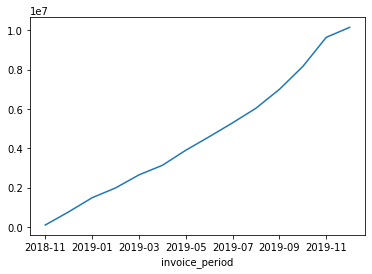

In [41]:
ax = invoice_period_agg['total_order_rev'].cumsum().plot()
ax.set_yscale('linear')
plt.show()


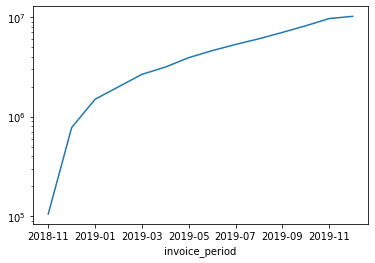

In [42]:
ax2 = invoice_period_agg['total_order_rev'].cumsum().plot()
ax2.set_yscale('log')
plt.show()

Conclusion:

The general trend is clearly a positive one during the all period.

In [43]:
# sort the table by each of the columns:
print('Sorted by number of total units in each month:')
sorted_by_units_invoice_period_agg = invoice_period_agg.sort_values(by='total_units',  ascending=False)
display(sorted_by_units_invoice_period_agg)


Sorted by number of total units in each month:


total_product_types  total_units  total_order_rev
invoice_period                                                   
2019-11                        2907       769207        1480865.9
2019-10                        2866       655542        1162194.6
2019-09                        2714       529774         957867.3
2019-08                        2584       438667         744911.6
2019-07                        2677       419082         706776.8
2019-01                        2559       411317         716245.8
2019-05                        2508       411031         764514.2
2019-03                        2447       372127         663374.3
2019-06                        2563       367992         687346.7
2018-12                        2686       299305         669860.5
2019-04                        2404       290456         486679.0
2019-02                        2342       276697         497858.5
2019-12                        2335       257315         507289.6
2018-11                        1589        57917         104988.6

Conclusion:

The invoice period with the highest units sold is 2019-11. 	769207 units were sold. (out of 2907 product types that were sold then and generated 1480865.9 for revenur rate)

In [44]:
print('Sorted by total revenue in each month:')
sorted_by_revs_invoice_period_agg = invoice_period_agg.sort_values(by='total_order_rev' ,  ascending=False)
display(sorted_by_revs_invoice_period_agg)


Sorted by total revenue in each month:


total_product_types  total_units  total_order_rev
invoice_period                                                   
2019-11                        2907       769207        1480865.9
2019-10                        2866       655542        1162194.6
2019-09                        2714       529774         957867.3
2019-05                        2508       411031         764514.2
2019-08                        2584       438667         744911.6
2019-01                        2559       411317         716245.8
2019-07                        2677       419082         706776.8
2019-06                        2563       367992         687346.7
2018-12                        2686       299305         669860.5
2019-03                        2447       372127         663374.3
2019-12                        2335       257315         507289.6
2019-02                        2342       276697         497858.5
2019-04                        2404       290456         486679.0
2018-11                        1589        57917         104988.6

Conclusion:

The invoice period with the highest revenue(for orders) sold is also 2019-11. Revenue of  1480865.9 was generated then.

In [45]:
print('Sorted by total product type in each month:')
sorted_by_product_type_invoice_period_agg = invoice_period_agg.sort_values(by='total_product_types',  ascending=False)
display(sorted_by_product_type_invoice_period_agg)

Sorted by total product type in each month:


total_product_types  total_units  total_order_rev
invoice_period                                                   
2019-11                        2907       769207        1480865.9
2019-10                        2866       655542        1162194.6
2019-09                        2714       529774         957867.3
2018-12                        2686       299305         669860.5
2019-07                        2677       419082         706776.8
2019-08                        2584       438667         744911.6
2019-06                        2563       367992         687346.7
2019-01                        2559       411317         716245.8
2019-05                        2508       411031         764514.2
2019-03                        2447       372127         663374.3
2019-04                        2404       290456         486679.0
2019-02                        2342       276697         497858.5
2019-12                        2335       257315         507289.6
2018-11                        1589        57917         104988.6

Conclusion:

The invoice period with the largest range of product sold is also 2019-11. 769207 units were sold, out of 2907 product types that were sold then and generated 1480865.9 for revenur rate)

Make sense if the if assortment have not change dramatically.

invoice_period  total_product_types  total_units  total_order_rev
0         2018-11                 1589        57917         104988.6
1         2018-12                 2686       299305         669860.5
2         2019-01                 2559       411317         716245.8
3         2019-02                 2342       276697         497858.5
4         2019-03                 2447       372127         663374.3
5         2019-04                 2404       290456         486679.0
6         2019-05                 2508       411031         764514.2
7         2019-06                 2563       367992         687346.7
8         2019-07                 2677       419082         706776.8
9         2019-08                 2584       438667         744911.6
10        2019-09                 2714       529774         957867.3
11        2019-10                 2866       655542        1162194.6
12        2019-11                 2907       769207        1480865.9
13        2019-12                 2335       257315         507289.6

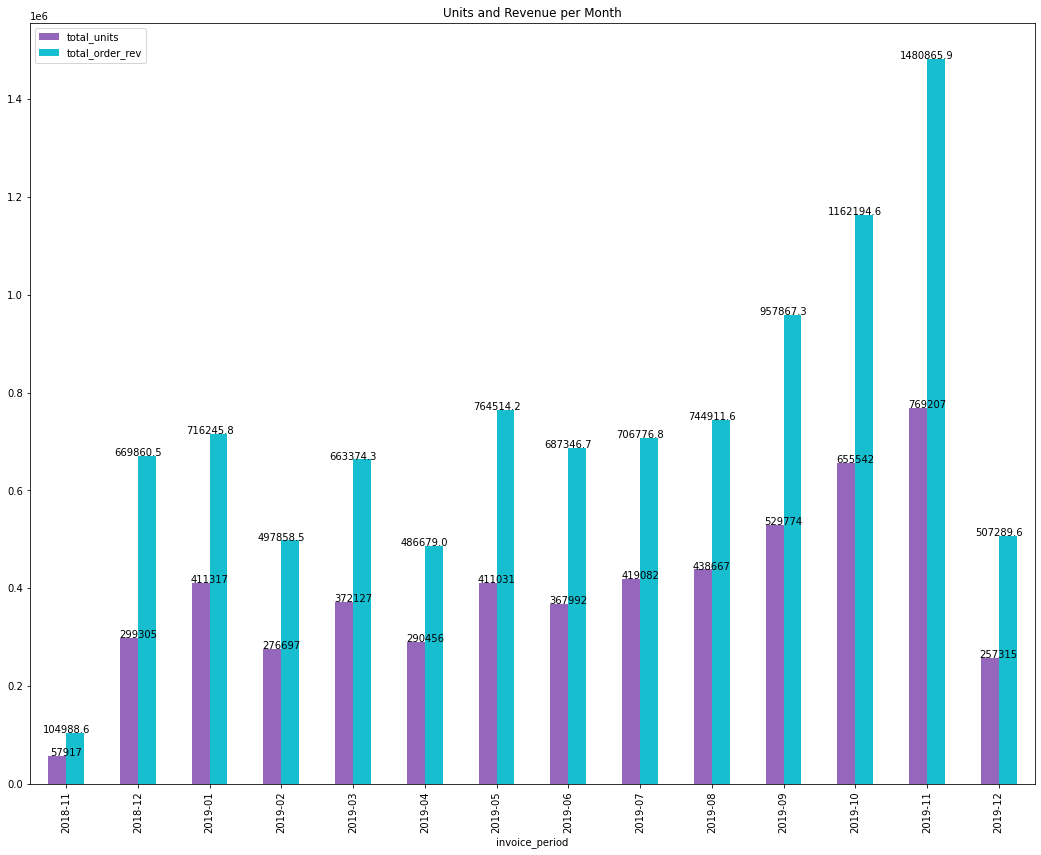

In [46]:
def add_value_label(x_list,y1_list, y2_list):
    for i in range(0, len(x_list)):
        plt.annotate(y1_list[i],(i,y1_list[i]),ha="center")
        plt.annotate(y2_list[i],(i,y2_list[i]),ha="center")


invoice_period_agg.reset_index(inplace=True)
invoice_period_agg.plot(x="invoice_period", y=["total_units", "total_order_rev"], kind="bar", color=["C4","C9"], title='Units and Revenue per Month', figsize= (18,14))
add_value_label(invoice_period_agg.invoice_period, invoice_period_agg.total_order_rev, invoice_period_agg.total_units,)
display(invoice_period_agg)

Conclusion:


The table and the bar above shows how November 2019 has the best sales considering all of three: units, range of product type and amount of generated profit (revenue) that were sold. 

The lowest goes to November 2018! interesting what is the reason to that conspicuous dramatic change.. 

<b id="-split">     

### Splitting products by category and finding: 
 - The leading categories regarding the number of items in each category 
 - The leading categories in sales

In [47]:
# Splitting products by category and finding the leading categories regarding the number of items in each category:

# Proportions of the various types of product
# leading product - most selling :

grouped_items=df.groupby(['category'])['description'].nunique().reset_index()
grouped_items.columns = ['item_category' , 'max_number_items']
display(grouped_items)

fig3 = px.pie(grouped_items, values=grouped_items.max_number_items, names=grouped_items.item_category,
              color=grouped_items.item_category,
color_discrete_map={'Sendo':'cyan', 'Tiki':'royalblue','Shopee':'darkblue'})
fig3.update_layout(
title="<b> Split by Categories</b>")

item_category  max_number_items
0              bags               208
1              bath                17
2             boxes               142
3   clothes/bedding                70
4        decoration               790
5            dishes               975
6        disposable                97
7       electronics                80
8         furniture               178
9             games                70
10           garden                19
11  holders/hangers               198
12          jewelry               291
13            other               539
14            party               227
15           school               104
16            tools                13

Conclusion:

The leading product category in number of items is dishes  (24.3%) with decoration coming second , follwed by decorations (19.7%). 
In other words, the category with the largest range of product is dishes! then decoration..

The category with the smallest range of product is tools with 13 items only!

In [48]:
# Splitting products by category and finding the leading categories in sales:

df_item_sales=df.groupby(["category"])['tot_order'].sum().sort_values(ascending=False)
df_item_sales=df_item_sales.to_frame()
# Reset the index of dataframe
modified = df_item_sales.reset_index()
modified.rename(columns={'tot_order':'sales'}, inplace=True)

from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = "sales",
            y = "category",
            data = modified)
plt.title("Category wise Sales")
plt.show()

Conclusion:


The leading product category in sales is also dishes with decoration coming second again and tools again last.

<b id="-selling">    

### Finding the top ten selling products:

In [49]:
#import missingno as msno
from textwrap import wrap
# top selling items by sales
sales_order = df.groupby('description').sum()['tot_order'].nlargest(10)#description

plt.figure(figsize = (30,10))
ax = sns.barplot(x = sales_order.index, y = sales_order.values, palette = 'seismic_r')
ax.set_xlabel('Product Description', fontsize = 20)
ax.set_ylabel('Total Sales', fontsize = 20)
ax.set_title('Top 10 Selling Products', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in sales_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in sales_order.values:
    value_labels.append(str(int(x/1000))+' k')

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)
    

Conclusion:

The leading product in total sales  is cake-stand with paper little birdie coming second and hanging heart t-light holder coming third in sales ..

Jumbo bag, storage jar, rabbit night light , paper chain kit 50's christmas, assorted collo bird ornament, chilly light and spotty bounting are in the top ten as well.

<b id="-refunds">

###  Examining Refunds: by total amount and by frequency:  

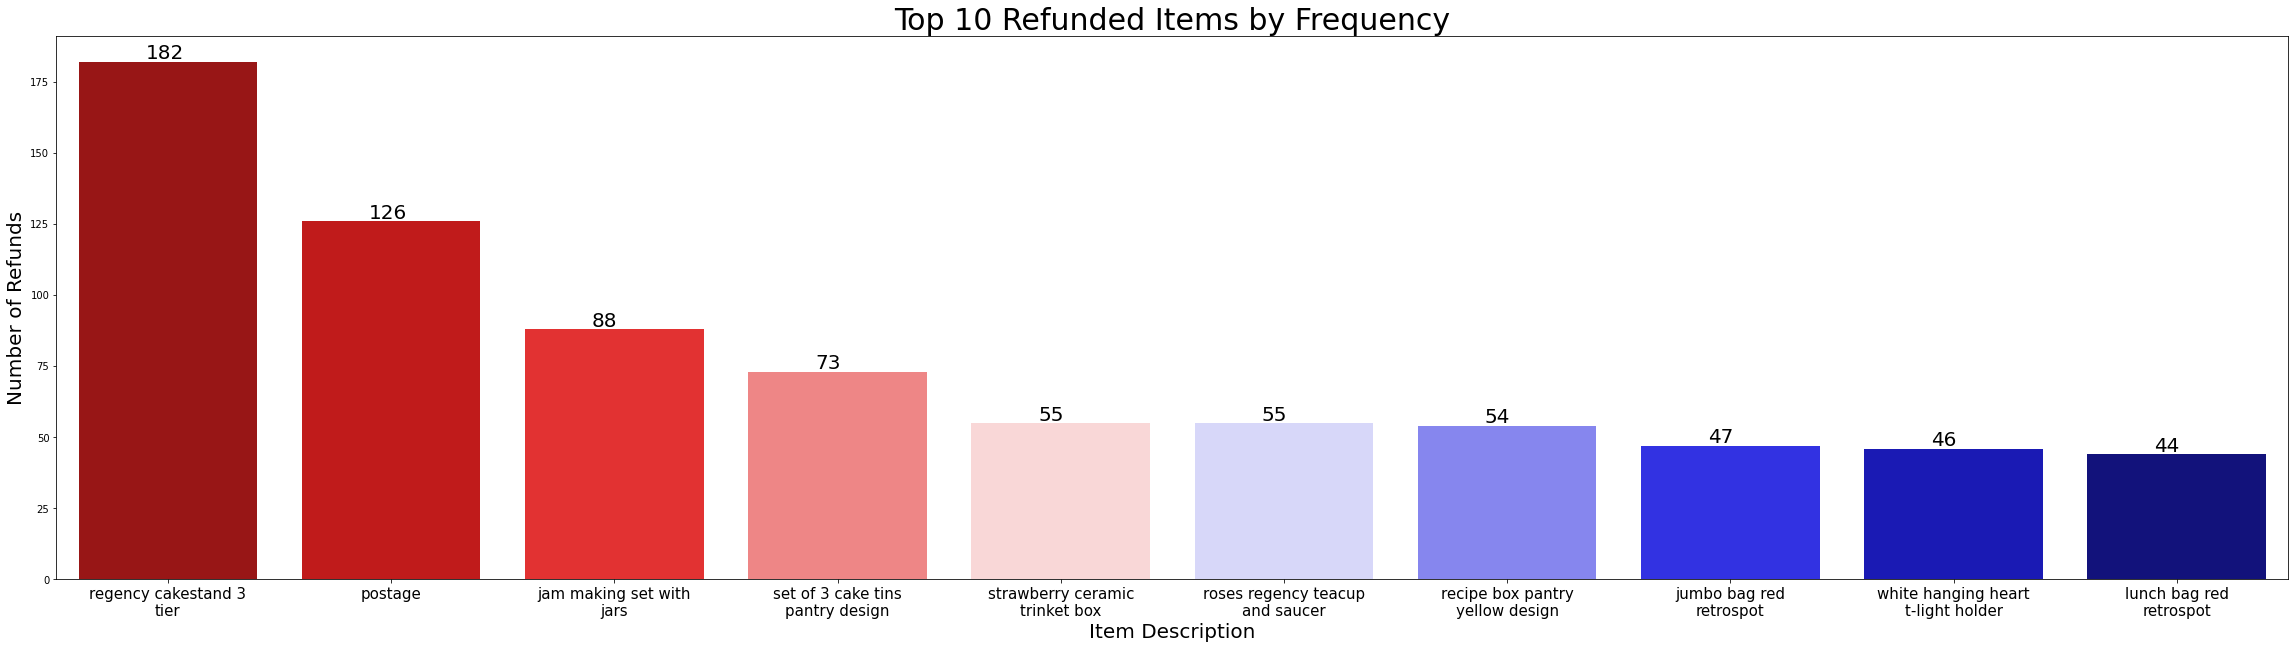

In [50]:
# Examining Refunds by total amount:  
# Refunds/Cancellations:
# Lets take a look at refunds and what the most frequent and largest refunds are.

refund_df = pd.concat([neg_zero_unit_price_df, refunds_df_cancelations])

plt.figure(figsize = (40,10))
ax = sns.barplot(x = refund_df['description'].value_counts().nlargest(10).index, y = refund_df['description'].value_counts().nlargest(10).values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Number of Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Frequency', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in refund_df['description'].value_counts().nlargest(10).index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, refund_df['description'].value_counts().nlargest(10).values):
    ax.annotate(label, (p.get_x() + 0.3, p.get_height() + 1), fontsize = 20)

top_refund_amt = -refund_df.groupby('description').sum()['tot_order'].nsmallest(10)


Conclusion:



Surprisingly, Cake-stand also stars in the first place amont refunded items by frequency , followed by postage and jam making set with jars. 

In [51]:
# Examining Refunds by total amount and by frequency:  
plt.figure(figsize = (40,10))
ax = sns.barplot(x = top_refund_amt.index, y = top_refund_amt.values, palette = 'seismic_r')
ax.set_xlabel('Item Description', fontsize = 20)
ax.set_ylabel('Total Amount in Refunds', fontsize = 20)
ax.set_title('Top 10 Refunded Items by Total Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 20)) for l in top_refund_amt.index ]
ax.set_xticklabels(labels, fontsize = 15)

for p, label in zip(ax.patches, top_refund_amt.values):
    ax.annotate(label, (p.get_x() + 0.2, p.get_height() + 10), fontsize = 20)

Conclusions:

Paper craft, little birdie is in the first place amont refunded items by total amount. Postage moved to the third place here while medium ceramic top storage jar is in the second place instead!

In [52]:
large_refunds = refund_df['tot_order'].nsmallest(10).index
for refund in large_refunds:
    print(-refund_df.loc[refund]['quantity'], ' units of ', refund_df.loc[refund]['description'])#, ' refunded at ', -refund_df.loc[refund]['tot_order'])

80995  units of  paper craft , little birdie
74215  units of  medium ceramic top storage jar
1  units of  postage
3114  units of  fairy cake flannel assorted colour
1930  units of  white hanging heart t-light holder
670  units of  doormat fairy cake
756  units of  pantry chopping board
2000  units of  gin + tonic diet metal sign
1300  units of  tea time party bunting
318  units of  ivory diner wall clock


conclusion:

Above are the largest refunds products with their names and number of units..

In [53]:
# Adding 
#df['month'] = df['invoice_date'].dt.month_name()
#df['year'] = df['invoice_date'].dt.year

#df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
#df['month'] = pd.DatetimeIndex(df['invoice_date']).month
#display(df.head())

<b id="-recommender">


## Product Bundle(Basket) Analysis and Recommender System:

   * Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm
   * Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products
   * Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products    
  


<b id="-recommender">

**Support** - popularity of the item overall.To calculate support we need to take all transactions that included item, count them and then divide by the total number of transactions (popularity in the basket).

**Condfidence** - is the probability that a item 2 will be bought together with item 1. <br>
To calculate confidence we take all the transactions when to items were sold together and then divide their number by the number of transactions that had item 1. 

basket - purchase wise get rules of what items are boought together,, what  popular items, what items increase the chances of other items been bought  , or general what to reccomand base on what is already boght (appriori and assosiate. statistic relationships of items) recommed what  recommend base on similarity of what you bought. 

In [54]:
# how many transactions - purchases we have: 19780


<b id="-basket">  

### Create a basket for each transaction (invoice) and study the popullarity for products to appear (in any transaction/invoice) as well as for their different combinations by using Apriori Algorithm


In [55]:
# Group data by transaction and item to calculate how many transactions had our item of interest. creating a basket to each transaction.
purchases_df = df.groupby(['invoice_no', 'item'])['item'].count().reset_index(name ='count')
# in order to realize for any purchase/transaction (invoice_no)  count how many items were bought in each order.
#this is a general df, we will use it for the algorythm itself as well. 

display(purchases_df.sample(5))
print()
display()
purchases_df.describe()

invoice_no                         item  count
246868     560892                 bag polkadot      1
473584     580541      pack panettone gift box      1
1178       536536   christmas decoupage candle      1
50587      541104              cake towel spot      1
41784      540353  homemade jam scented candle      1

count
count  489606.000000
mean        1.063141
std         0.326747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        24.000000

Conclusion:

There are 489668 rows meaning there are 489668 purchases!

In [56]:
# First of all we need to create a basket for each transaction/ purchase.

basket_df = (purchases_df
          .groupby(['invoice_no', 'item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_no'))

display(basket_df.sample(5))

item        abc treasure book box  abstract circle journal  \
invoice_no                                                   
558418                        0.0                      0.0   
549594                        0.0                      0.0   
547866                        0.0                      0.0   
564354                        0.0                      0.0   
572465                        0.0                      0.0   

item        abstract circle pocket book  abstract circle sketchbook  \
invoice_no                                                            
558418                              0.0                         0.0   
549594                              0.0                         0.0   
547866                              0.0                         0.0   
564354                              0.0                         0.0   
572465                              0.0                         0.0   

item        acrylic faceted bangle  acrylic geometric lamp  \
invoice_no                                                   
558418                         0.0                     0.0   
549594                         0.0                     0.0   
547866                         0.0                     0.0   
564354                         0.0                     0.0   
572465                         0.0                     0.0   

item        acrylic hanging jewel  acrylic jewel angel  acrylic jewel icicle  \
invoice_no                                                                     
558418                        0.0                  0.0                   0.0   
549594                        0.0                  0.0                   0.0   
547866                        0.0                  0.0                   0.0   
564354                        0.0                  0.0                   0.0   
572465                        0.0                  0.0                   0.0   

item        acrylic jewel snowflake  ...  zinc holder star  \
invoice_no                           ...                     
558418                          0.0  ...               0.0   
549594                          0.0  ...               0.0   
547866                          0.0  ...               0.0   
564354                          0.0  ...               0.0   
572465                          0.0  ...               0.0   

item        zinc metal heart decoration  zinc plant pot holder  \
invoice_no                                                       
558418                              0.0                    0.0   
549594                              0.0                    0.0   
547866                              0.0                    0.0   
564354                              0.0                    0.0   
572465                              0.0                    0.0   

item        zinc star holder  zinc sweetheart soap dish  \
invoice_no                                                
558418                   0.0                        0.0   
549594                   0.0                        0.0   
547866                   0.0                        0.0   
564354                   0.0                        0.0   
572465                   0.0                        0.0   

item        zinc sweetheart wire letter rack  zinc top door wooden shelf  \
invoice_no                                                                 
558418                                   0.0                         0.0   
549594                                   0.0                         0.0   
547866                                   0.0                         0.0   
564354                                   0.0                         0.0   
572465                                   0.0                         0.0   

item        zinc willie winkie candle stick  zinc wire kitchen organiser  \
invoice_no                                                                 
558418                                  0.0                          0.0  

In [57]:
# Since it doesn't matter to us how many items were bought, just the fact that the item was bought in the transactions, use the following 
# function to turn numerical to categorical(1 or 0. exist in basket or not. to calculate probab..)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket_df.applymap(encode_units)# 19780 

Now , this basket can be passed to apriori algorithm that can calculate support for all items and their combinations.
This algorithm requires to define min_support which is the minimum support that we consider. 
Let's define low min_support which means that only items and combinations that appeared at least 3% of a time will be included.
    
 **Note**: min_support in apriori will later influence our other calculations, it's ok to set lower min_support, but to have more combinations later    

Appriori returns items and pairs of items sorted by support .

Appriori calculates 'support' values for all product and their combinations. (all possible combinations (baskets sets) in a basket)

analayzing basket look in every purchase..(weather we have x in basket-purchases or not. (and not how many..) 
Thus, Appriori help to find the (strong) and weak links then use Association Rule to uplift sales 

In [58]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False)
# min_support of 3% means that item appeared on atleast 3% of buskets


support                      itemsets
47   0.127098        (hanging heart holder)
53   0.108342                (heart wicker)
10   0.105763               (bag retrospot)
101  0.100556      (regency cakestand tier)
0    0.087664        (alarm clock bakelike)
..        ...                           ...
78   0.030384     (pack dinosaur cake case)
35   0.030334         (doormat new england)
26   0.030334  (childrens cutlery polkadot)
8    0.030081                    (bag pear)
90   0.030030           (pencil tube skull)

[144 rows x 2 columns]

Appriori returns items and pairs of items sorted by support 

Appriori calculates 'support' values for all product and their combinations. (all possible combinations (baskets sets) in a basket)

analayzing basket look in every purchase..(weather we have x in basket-purchases or not. (and not how many..) 
Thus, Appriori help to find the (strong) and weak links then use Association Rule to uplift sales 

In [59]:
# support for x: (subsetting)count number of purchases that has x in it then devide it by num of total purchases there are
# the result of suport is the share of baskets with the item.

print('The top leading products regarding support:')
display(frequent_itemsets.sort_values(by='support', ascending=False).head(20))


The top leading products regarding support:


support                          itemsets
47   0.127098            (hanging heart holder)
53   0.108342                    (heart wicker)
10   0.105763                   (bag retrospot)
101  0.100556          (regency cakestand tier)
0    0.087664            (alarm clock bakelike)
69   0.079070             (lunch bag retrospot)
2    0.073559          (assorted bird ornament)
96   0.071183                  (popcorn holder)
23   0.070020          (cake tin pantry design)
81   0.066734        (pack retrospot cake case)
72   0.064965           (lunch bag suki design)
70   0.064358                 (lunch bag skull)
77   0.063145  (natural slate heart chalkboard)
9    0.061577                    (bag polkadot)
119  0.059858                (storage bag suki)
113  0.059403         (shopper vintage paisley)
61   0.058746              (jam making printed)
86   0.058645       (paper chain kit christmas)
71   0.058493       (lunch bag spaceboy design)
66   0.058140                   (lunch bag car)

Conclusion:

Hanging heart holder appears in 12.7% of the baskets, heart wicker appears in 10.8%, bag retrospot in 10.5% and regency cakestand tier with 10% etc..

Those are the 20 leading popular products (support wize): 

hanging heart holder, heart wicker, bag retrospot, regency cakestand tier, alarm clock bakelike, lunch bag retrospot, assorted bird ornament, popcorn holder, cake tin pantry design, pack retrospot cake case, lunch bag suki design, lunch bag skull,natural slate heart chalkboard, bag polkadot, storage bag suki, shopper vintage paisley, jam making printed, paper chain kit christmas, lunch bag spaceboy design, lunch bag car.  

In [60]:
print('The least  popular products regarding support:')

# Creating a list of unpopular items (regarding 'support') in order to treat them later on..
unpopular_product_list = ['pencil tube skull', 'bag pear', 'doormat new england', 'childrens cutlery polkadot', 'pack dinosaur cake case', 'hanging heart zinc holder', 'edwardian parasol', 'lunch bag retrospot', 'lunch bag polkadot', 'vintage head tail card game', 'hot bath metal sign',' traditional knitting nancy' ,'wicker star', 'paper chain kit retrospot', 'vintage christmas napkin', 'stripe ceramic drawer knob',
'bread bin diner style', 'sweetheart fairy cake case', 'doormat union flag', 'cream felt craft trinket box' , 'cake case vintage christmas']

display(frequent_itemsets.sort_values(by='support',ascending=True).head(20))

The least  popular products regarding support:


support                                   itemsets
90   0.030030                        (pencil tube skull)
8    0.030081                                 (bag pear)
35   0.030334                      (doormat new england)
26   0.030334               (childrens cutlery polkadot)
78   0.030384                  (pack dinosaur cake case)
49   0.030485                (hanging heart zinc holder)
38   0.030586                        (edwardian parasol)
140  0.030637  (lunch bag retrospot, lunch bag polkadot)
129  0.030738              (vintage head tail card game)
56   0.030789                      (hot bath metal sign)
126  0.030789               (traditional knitting nancy)
131  0.030789                              (wicker star)
87   0.030839                (paper chain kit retrospot)
128  0.030839                 (vintage christmas napkin)
122  0.030940               (stripe ceramic drawer knob)
20   0.030991                    (bread bin diner style)
123  0.031092               (sweetheart fairy cake case)
37   0.031143                       (doormat union flag)
31   0.031143             (cream felt craft trinket box)
22   0.031294              (cake case vintage christmas)

Conclusion:

Those are the 20 least leading ones: 

pencil tube skull, bag pear, doormat new england, childrens cutlery polkadot, pack dinosaur cake case, hanging heart zinc holder, edwardian parasol, lunch bag retrospot, lunch bag polkadot, vintage head tail card game, hot bath metal sign, traditional knitting nancy ,wicker star, paper chain kit retrospot, vintage christmas napkin, stripe ceramic drawer knob,
bread bin diner style, sweetheart fairy cake case, doormat union flag, cream felt craft trinket box and cake case vintage christmas.

All of them with popularity rate('support' value) of 3% in baskets. 

<b id="-additional">

### Calculate other Basket metrics using association_rule method in order to realize how to expand sails in the basket level by recommending additional products:

 **Lift** - in what ratio is the purchase of items bought together is more likely than separately?

General rule of thumb for lift:
- If lift>1 than products have high chance to be bough together and "uplift" each other <br> 
- If lift=1 than products don't really influence each other <br> 
- If lift<1 than products there is no connection between products<br> 

In [61]:
# calculating it to combination of items and their lift - to find the top comb which lift each other up..
# sort by confidence in descending order:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)#48 sec
rules.sort_values('confidence', ascending = False, inplace = True)
display(rules.head(10))

antecedents                   consequents  \
15  (rose regency teacup saucer)       (regency teacup saucer)   
14       (regency teacup saucer)  (rose regency teacup saucer)   
0                 (bag polkadot)               (bag retrospot)   
5             (storage bag suki)               (bag retrospot)   
2      (shopper vintage paisley)               (bag retrospot)   
9           (lunch bag polkadot)         (lunch bag retrospot)   
13       (lunch bag suki design)         (lunch bag retrospot)   
11             (lunch bag skull)         (lunch bag retrospot)   
12         (lunch bag retrospot)       (lunch bag suki design)   
10         (lunch bag retrospot)             (lunch bag skull)   

    antecedent support  consequent support   support  confidence       lift  \
15            0.053893            0.058038  0.041709    0.773921  13.334635   
14            0.058038            0.053893  0.041709    0.718641  13.334635   
0             0.061577            0.105763  0.041709    0.677340   6.404294   
5             0.059858            0.105763  0.036603    0.611486   5.781646   
2             0.059403            0.105763  0.034378    0.578723   5.471869   
9             0.055106            0.079070  0.030637    0.555963   7.031301   
13            0.064965            0.079070  0.033064    0.508949   6.436713   
11            0.064358            0.079070  0.032406    0.503535   6.368236   
12            0.079070            0.064965  0.033064    0.418159   6.436713   
10            0.079070            0.064358  0.032406    0.409847   6.368236   

    leverage  conviction  
15  0.038581    4.166519  
14  0.038581    3.362635  
0   0.035196    2.771451  
5   0.030272    2.301687  
2   0.028095    2.122683  
9   0.026280    2.073996  
13  0.027927    1.875428  
11  0.027318    1.854975  
12  0.027927    1.607028  
10  0.027318    1.585422

Here we see on top our "pair" Toast and Coffee, and their metrics. Let's take a look at them one more time and get to know some new metrics: <br>
- **antecedents** - means the "if" part of the sentence "IF I buy 'roses regency teacup and saucer , pink regenc.'(Toast),..." <br>
- **consequents** -  "then" part of the sentence "...,then the probability of buying 'green regency teacup and saucer'(Coffee..."- is confidence(90%
- **antecedent/consequent support** -  corresponding supports of the items. Do not change depending on the pair.
- **leverage** - another measure of independence. leverage=0 equals 0 independence
- **conviction** - Similar as lift, but means that consequent is highly depending on the antecedent. Rules of thumb the same as for lift

Conclusions :

The highest confidence  77.4% of the baskets goes to: 'rose regency teacup saucer'	and 'regency teacup saucer'. meaning that if a customer buys a rose regency teacup saucer 77.4% that he'll also buy regency teacup saucer. 
Their total support is 4.1% , antecedent support (of the first) is 5.3% ,consequent support (of the last) is 5.8%. 
This pair has the highest lift (13.3%) meaning that buying the first uplift the prop of buying the other. 
  
Another pair with  pretty high confidence of 67.7% of the baskets is: 'bag polkadot' and 'storage bag suki'. meaning that if a customer buys a bag polkadot 67.7% that he'll also buy regency storage bag suki. 
Their total support is 4.1% , antecedent support (of the first) is 6.1% ,consequent support (of the last) is 10.5%. 
This pair also has the high lift (6.4%) meaning that buying the first uplift the prop of buying the other. 
Lift is the ratio that the products are bought together more likely than seperately. (Lift(x+y) = (Confidence (x+y))/(Support (x)))

Note : The order may change the reasult: for example 'support same, 'confidece' values chage when changing the order of items.
Yet the overall support does not change and nither does the lift (since the setting here is to keep the higher in this case)


 meaning:if i buy y how purchase of it uplift the prop of buying of x
 That means that the ratio of increase of Coffe sales if Toast is bought is  0.1, which means that it doesn't matter to "Coffee" whether it's sold alone or together with toast

  conf_coffee_toast/sup_cofee. if low it wouldnt uplift coffee
 That means that the ratio of increase of Coffe sales if Toast is bought is  0.1, which means that it doesn't matter to "Coffee" wheth        
        

Association Rules vs Recommender System: ( here, Similarity System specificly)  

While the first allow expanding the basket and understand how to increse sales of an item knowing the item that already exist in the basket, the last detect similar items (in the basket) which "behaves" the same way , thus maximizing profit. 

The  first can be used for suggesting additional items while the last can be used for applying the same marketing strategies to similar items in the basket or suggesting simmilar items whem a specific wanted item is missing (the business is ruuning out of it)  

In other words, adding additional items vs interchangable items in basket. 

 we can reccommend 'green regency teacup and saucer' wheever we sell :roses regency teacup and saucer , pink regenc..., green regency teacup and saucer, pink regency.., pink regency teacup and saucer). leverage not high -do not influence the overall no of transactions. you can look vice versa . (support same, confidece - changes, lift - same cause they keep the highlift, conviction -1 - no rela

<b id="-interchangable">


### Studying product similarities in order to realize how to mantain and increase profits (in a basket level) by recommanding sustitutional/interchangable products:


In [62]:
# recommendder system-Similiarity: cosine similary(there aaaere diffrent kinds than that.)

basket_new_df=basket_df
basket_new_df = basket_new_df.fillna(0).reset_index()
basket_new_df=basket_new_df.drop('invoice_no', axis=1)

In [63]:
co_matrix = basket_new_df.T.dot(basket_new_df)
np.fill_diagonal(co_matrix.values, 0)
#looking for same pattern. complementary items. give back items behave 

In [64]:
cos_score_df = pd.DataFrame(cosine_similarity(co_matrix))
cos_score_df.index = co_matrix.index
cos_score_df.columns = np.array(co_matrix.index)

In [65]:
cos_score_df=cos_score_df.reset_index()
display(cos_score_df.sample(10))

item  abc treasure book box  \
1284            french chateau fruit bowl               0.229573   
651                       cinammon wreath               0.695713   
2624           rocking horse hand painted               0.877657   
1823  lighthouse trading zero invc incorr               0.000000   
2153             pack paisley park tissue               0.896794   
2539          retrospot babushka doorstop               0.783197   
133          asstd design bubble gum ring               0.626205   
2724               six drawer office tidy               0.638990   
1450    glitter snow pear tree decoration               0.282995   
635       christmas tree heart decoration               0.804647   

      abstract circle journal  abstract circle pocket book  \
1284                 0.221729                     0.301183   
651                  0.553051                     0.555797   
2624                 0.689855                     0.618608   
1823                 0.000000                     0.000000   
2153                 0.709432                     0.636569   
2539                 0.708300                     0.594746   
133                  0.794481                     0.479976   
2724                 0.468206                     0.523994   
1450                 0.301392                     0.219431   
635                  0.935229                     0.546267   

      abstract circle sketchbook  acrylic faceted bangle  \
1284                    0.216860                0.199836   
651                     0.738219                0.602032   
2624                    0.899439                0.785687   
1823                    0.000000                0.000000   
2153                    0.906817                0.807265   
2539                    0.817853                0.744262   
133                     0.695398                0.659694   
2724                    0.636333                0.511410   
1450                    0.263982                0.253069   
635                     0.840067                0.845814   

      acrylic geometric lamp  acrylic hanging jewel  acrylic jewel angel  \
1284                0.144530               0.150574             0.034806   
651                 0.368619               0.587250             0.046948   
2624                0.469759               0.633377             0.050783   
1823                0.000000               0.000000             0.000000   
2153                0.480079               0.592777             0.054546   
2539                0.577670               0.524486             0.055683   
133                 0.550103               0.438358             0.043595   
2724                0.315241               0.507892             0.050512   
1450                0.216083               0.241104             0.000000   
635                 0.793186               0.546405             0.072939   

      acrylic jewel icicle  ...  zinc holder star  \
1284              0.166007  ...          0.240882   
651               0.567572  ...          0.704803   
2624              0.623200  ...          0.853100   
1823              0.000000  ...          0.000000   
2153              0.603695  ...          0.845573   
2539              0.571066  ...          0.749474   
133               0.583092  ...          0.610187   
2724              0.446141  ...          0.614310   
1450              0.229825  ...          0.288272   
635               0.637191  ...          0.810554   

      zinc metal heart decoration  zinc plant pot holder  zinc star holder  \
1284                     0.262512               0.000000          0.186230   
651                      0.723613               0.080260          0.659010   
2624                     0.829462               0.098947          0.843452   
1823                     0.000000               0.000000          0.000000   
2153                     0.810519               0.103631          0.857651   
2539                     0.762279               0.08555

In [66]:
#creating recommender system: items that behave the same as.. 

display(cos_score_df[cos_score_df.item=='cake case vintage christmas'].T)

def find_top_in(check):
    subset=cos_score_df[cos_score_df.filtered_corpus==check]
    subset=subset.T.reset_index()
    subset.columns=['pairs','correlation']
    #removing item itself from dataset
    subset=subset[subset.correlation!=check]
    subset=subset[subset.pairs!=check]
    subset_top=subset.sort_values(by='correlation',ascending=False).head(10)
    return subset_top


#for product in df['description'].values:
#    find_top_in(product)
# pencil tube skull, bag pear, doormat new england, childrens cutlery polkadot, pack dinosaur cake case, hanging heart zinc holder, edwardian parasol, lunch bag retrospot, lunch bag polkadot, vintage head tail card game, hot bath metal sign, traditional knitting nancy ,wicker star, paper chain kit retrospot, vintage christmas napkin, stripe ceramic drawer knob,
# bread bin diner style, sweetheart fairy cake case, doormat union flag, cream felt craft trinket box and cake case vintage christmas.

#All of them with popularity rate('support' value) of 3% in baskets.

357
item                              cake case vintage christmas
abc treasure book box                                0.893556
abstract circle journal                              0.782481
abstract circle pocket book                          0.668134
abstract circle sketchbook                           0.909834
...                                                       ...
zinc sweetheart wire letter rack                     0.822014
zinc top door wooden shelf                           0.572785
zinc willie winkie candle stick                      0.928882
zinc wire kitchen organiser                          0.718695
zinc wire sweetheart letter tray                     0.724716

[3375 rows x 1 columns]

Conclusion:

The online store can use this function to find the top 10 products that resamble items which are missing or to imply marketing strategy on them.. (Perhaps for some of the product with the lowest support or the ones we consider unpopular for other reasons)

For example one of the product with the lowest support is cake case vintage christmas when applying the function on this it returns product product with similar behavior. 'abc treasure book box' is the one that resamble it the  most. 


<b id="-market"> 

## Product Market Values Analysis:

   * Calculate product recency-frequency-monetary (RFM Metrics)
   * Study product RFM distributions (in order to determine the segmentation split
   * Categorize products based on RFM frame
   * Charactarize the product clusters based on R, F and M scores   

<b id="-market">

<b id="-rfm">    

### Calculate product recency-frequency-monetary (RFM Metrics):

In [67]:
# Determine recency:
from datetime import date
today=date.today()
display(today)


import datetime as dt
NOW=dt.datetime(2019,12,8)# 2018-11-29   2019-12-07

datetime.date(2022, 5, 22)

In [68]:
# Calculating recency, frequency and monetary for each item (using the filtered corpus):
rfm=df.groupby('item').agg({
    'invoice_date': lambda x: (NOW-x.max()).days, # last date of purchase for product. max date for product 
    'stock_code': 'count', #nuinque #invoice_no
    'unit_price':'sum'
}).reset_index()

rfm.rename(columns=
                    {'invoice_date':'recency',
                    'stock_code':'frequency',
                   'unit_price':'monetary'},inplace=True)


display(rfm.describe())
display(rfm.info())

recency    frequency      monetary
count  3374.000000  3374.000000   3374.000000
mean     47.165086   154.273859    506.596151
std      89.824118   235.056359   1142.073889
min       1.000000     1.000000      0.004000
25%       1.000000    18.250000     40.247500
50%       3.000000    77.000000    154.365000
75%      33.000000   196.000000    505.242500
max     374.000000  3865.000000  28091.260000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item       3374 non-null   object 
 1   recency    3374 non-null   int64  
 2   frequency  3374 non-null   int64  
 3   monetary   3374 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 105.6+ KB


None

Conclusion:

There  3374 4ows and 4 columns. no missing values or duplicates

description-product	recency	frequency	monetary_value
recency - how many days passed since the last purchase. min:1, max: 374, mean:47.16.
frequency - how often the product is bought. min:1,  max: 3865, mean:154.27.
monetary -  how much money the product produced. min : 0.004, max: 28091, mean: 506.60. 


<b id="-split">   

### Study product RFM distributions (in order to determine the segmentation split):

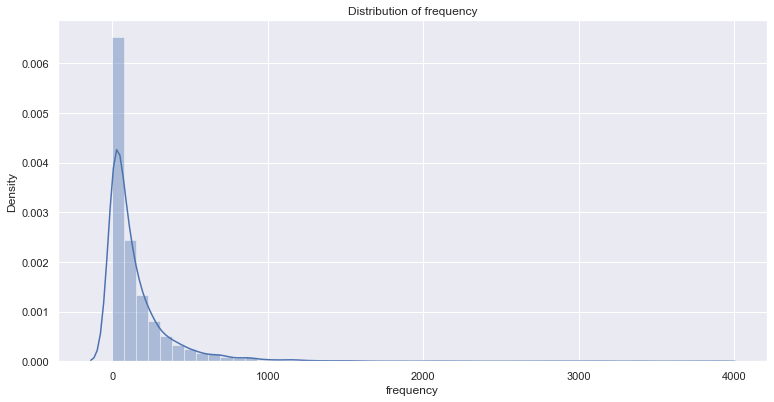

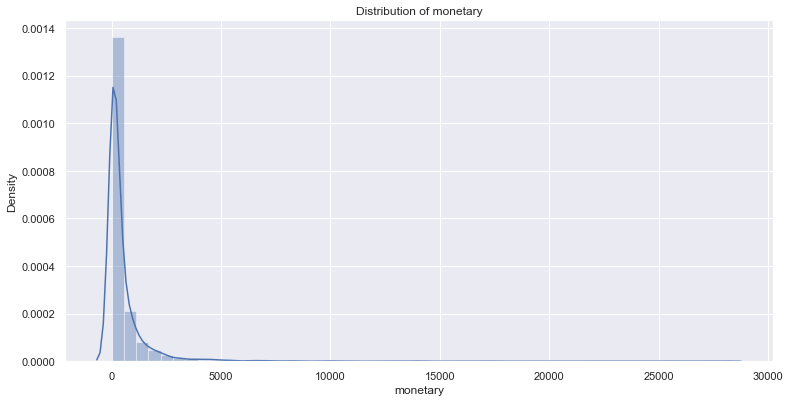

In [69]:
## Function to check skewness of rfm df:
def check_skew(rfm_df, column):
    skew = stats.skew(rfm_df[column])
    skewtest = stats.skewtest(rfm_df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(rfm_df[column])
    sns.set(rc={'figure.figsize':(12.7,6.27)} )
    plt.show()
    return


check_skew(rfm ,'recency')
check_skew(rfm,'frequency')
check_skew(rfm,'monetary')


Conclusion: The recency, frequency and monatery are highly skewed, so we will have to log-scale them in order to get a good segmentation split.

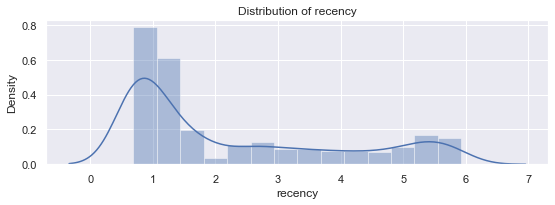

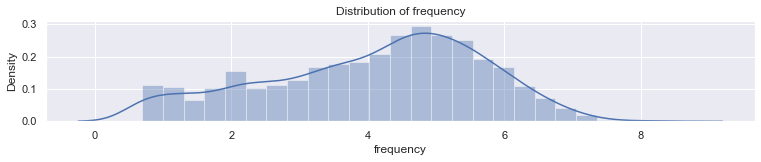

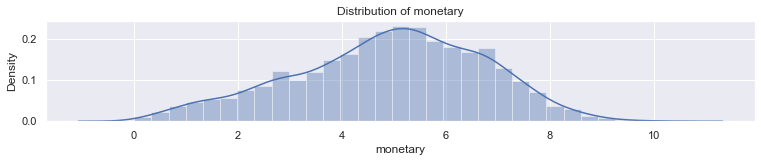

recency    frequency      monetary
count  3374.000000  3374.000000   3374.000000
mean     47.165086   154.273859    506.596151
std      89.824118   235.056359   1142.073889
min       1.000000     1.000000      0.004000
25%       1.000000    18.250000     40.247500
50%       3.000000    77.000000    154.365000
75%      33.000000   196.000000    505.242500
max     374.000000  3865.000000  28091.260000

<Figure size 914.4x451.44 with 0 Axes>

In [70]:
#Removing skewness by log-scaling
rfm_log = rfm.copy()
rfm_log['recency'] = np.log(rfm_log['recency']+1)
rfm_log['frequency'] = np.log(rfm_log['frequency']+1)
rfm_log['monetary'] = np.log(rfm_log['monetary']+1)

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(rfm_log,'recency')
plt.subplot(3, 1, 2)
check_skew(rfm_log,'frequency')
plt.subplot(3, 1, 3)
check_skew(rfm_log,'monetary')
plt.tight_layout()

rfm.describe()

Conclusions:
After log-scaling we are ready for segmentation. We will choose K-means to find good segmentation of the recency, frequency and monetery. 

item   recency  frequency  monetary
1911      marie antoienett trinket box  1.841809  -2.134320 -1.261404
1146              feltcraft doll molly -0.896933   1.090537  1.152883
779          crystal skull phone charm -0.663957  -1.120210 -1.288541
2887          sweet heart cake carrier -0.663957  -0.172488  0.675547
77    antique raspberry flower earring  0.838569  -1.556963 -1.112441

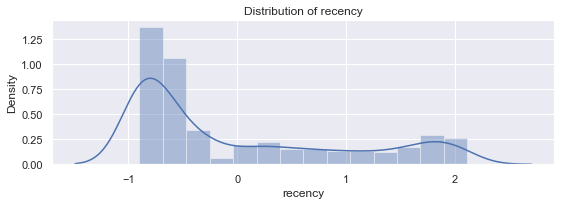

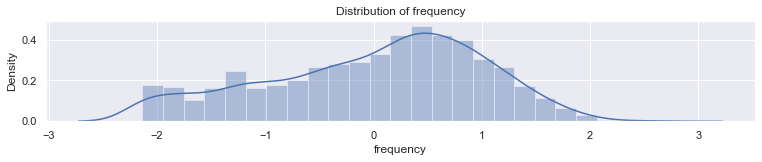

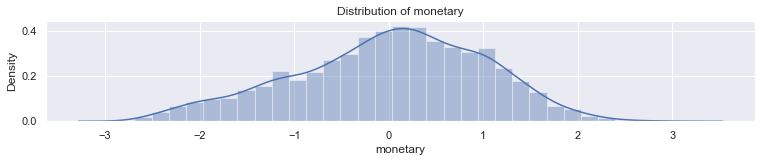

<Figure size 914.4x451.44 with 0 Axes>

In [71]:
# first step for k-means is to fit-transform the 'recency','frequency' and 'monetary' distributions: 

rfm_log_scaled = rfm_log.copy()
scaler = StandardScaler()
trans_array = scaler.fit_transform(rfm_log_scaled[['recency','frequency','monetary']])
rfm_log_scaled[['recency','frequency','monetary']] = trans_array

display(rfm_log_scaled.sample(5))

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(rfm_log_scaled,'recency')
plt.subplot(3, 1, 2)
check_skew(rfm_log_scaled,'frequency')
plt.subplot(3, 1, 3)
check_skew(rfm_log_scaled,'monetary')
plt.tight_layout()

<b id="-categorize">

## Categorize products based on K-MEANS:

In [72]:
# Let's see how many clusters, 3, 4 or 5, provide good clustering. 

from sklearn.manifold import TSNE

def kmeans(rfm_log_scaled_df, clusters_number, n_random):    
    kmeans = KMeans(n_clusters = clusters_number, random_state = n_random)
    kmeans.fit(rfm_log_scaled_df[['recency','frequency','monetary']])
    # Extract cluster labels
    cluster_labels = kmeans.labels_
    cluster_center = kmeans.cluster_centers_
    # Create a cluster label column
    rfm_log_scaled_df = rfm_log_scaled_df.assign(Cluster = cluster_labels)
    
    # TSNE is a tool to visualize high-dimensional data
    # We will use TSNE to give us a 2-d visualization of the clusters (which are 3-d)
    
    model = TSNE(random_state=1) # Initialise TSNE
    transformed = model.fit_transform(rfm_log_scaled_df[['recency','frequency','monetary']])
    # Plot TSNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return [cluster_labels, cluster_center]


plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
labels_k3, centers_k3 = kmeans(rfm_log_scaled, 3, 3)
plt.subplot(3, 1, 2)
labels_k4, centers_k4 = kmeans(rfm_log_scaled, 4, 4)
plt.subplot(3, 1, 3)
labels_k5, centers_k5 = kmeans(rfm_log_scaled, 5, 5)
plt.tight_layout()

Conclusion:

The KMEANS of the RFM (log-scaled and fitted) produces 5 well distinguished clusters.

In [73]:
# add the cluster labels to the rfm df:
rfm['cluster'] = labels_k5 + 1
# let's look at the centroids of the clusters in order to charecterize each of them:
display(centers_k5)
print()



array([[ 1.54702568, -1.56034101, -1.48396611],
       [-0.73316876,  1.10442494,  1.17390136],
       [-0.62096991,  0.31957735,  0.16170834],
       [-0.1382983 , -0.77228665, -0.79022966],
       [ 1.24443479, -0.1106045 ,  0.08426121]])

Conclusions:

From the centroids we get that
* 1: all bad: r-high, m-low, f-low. 
* 2: all good: r-low, m-high, f-high.
* 3: quite good: r-low, f-above avg, m-avg or above avg, 
* 4: quite bad: r - avg, f-low, m-low. 
* 5: bad recency: r-high, f-avg, m-avg

<b id="-RFM_scores">

## Charactarize the product clusters based on R, F and M scores

Next we calculate the R, F and M from the quantiles and find the RFM segments.

In [74]:
r_labels=range(2,0, -1) # the R lables are inverted!
rfm['R_score'] = pd.qcut(rfm_log_scaled['recency'], q=2, labels=r_labels,  duplicates = 'drop')
f_labels=range(1,4+1)
rfm['F_score'] = pd.qcut(rfm_log_scaled['frequency'], q=4, labels=f_labels, duplicates = 'drop')
m_labels=range(1,4+1)
rfm['M_score'] = pd.qcut(rfm_log_scaled['monetary'], q=4, labels=m_labels, duplicates = 'drop')

#Let's take a look at the segments we got.
rfm['RFM_segment']=rfm['R_score'].astype(str)+rfm['F_score'].astype(str)+rfm['M_score'].astype(str)

display(rfm['RFM_segment'].unique())
display(rfm['RFM_segment'].nunique())
display(rfm['RFM_segment'].value_counts())

rfm.head()

array(['244', '123', '221', '223', '222', '121', '111', '122', '243',
       '234', '233', '112', '133', '211', '212', '232', '132', '224',
       '143', '144', '124', '242', '231', '134', '113', '114', '131',
       '213', '241', '142'], dtype=object)

30

111    629
244    523
233    258
122    255
243    193
232    167
234    153
222    149
123    135
112    123
133    120
223    107
121    102
132     77
144     59
134     54
221     52
211     50
242     46
124     26
212     25
224     25
143     17
113     10
231      7
114      4
131      3
213      3
241      1
142      1
Name: RFM_segment, dtype: int64

item  recency  frequency  monetary  cluster R_score  \
0        abc treasure book box        2        227    604.55        2       2   
1      abstract circle journal       13         72    179.97        3       1   
2  abstract circle pocket book        3         44     37.40        4       2   
3   abstract circle sketchbook        2         77    359.56        3       2   
4       acrylic faceted bangle        1         28     59.01        4       2   

  F_score M_score RFM_segment  
0       4       4         244  
1       2       3         123  
2       2       1         221  
3       2       3         223  
4       2       2         222

In [75]:
# Let's plot the RFM segments for each cluster we found with k-means

grouped_rfm = rfm.groupby(['cluster'])

for name, group in grouped_rfm:
    print('cluster: ', name)
    display(group)
    display(group.RFM_segment.unique())
    print()
    #display(group.RFM_segment.mode()[0])
    print(f'cluster {name} :' , group.RFM_segment.mode()[0] )
    print()
    
    

cluster:  1


item  recency  frequency  monetary  \
7                   acrylic jewel angel      116          2      0.76   
9               acrylic jewel snowflake       75          7      6.55   
20             allium artificial flower      122          5      8.45   
24                      aluminium heart      162          6     14.94   
27    amber bertie glass bead bag charm      198         10     19.42   
...                                 ...      ...        ...       ...   
3340                 wrap summer design       61          5      2.10   
3341                wrap vintage doiley      123          2      0.84   
3348           yuletide image paper box      330          7     17.85   
3359       zinc heart lattice tray oval      227          7     41.65   
3366              zinc plant pot holder      211          1      2.89   

      cluster R_score F_score M_score RFM_segment  
7           1       1       1       1         111  
9           1       1       1       1         111  
20          1       1       1       1         111  
24          1       1       1       1         111  
27          1       1       1       1         111  
...       ...     ...     ...     ...         ...  
3340        1       1       1       1         111  
3341        1       1       1       1         111  
3348        1       1       1       1         111  
3359        1       1       1       2         112  
3366        1       1       1       1         111  

[550 rows x 9 columns]

array(['111', '121', '112'], dtype=object)


cluster 1 : 111

cluster:  2


item  recency  frequency  monetary  cluster  \
0             abc treasure book box        2        227    604.55        2   
11     advent calendar gingham sack        1        247   1415.17        2   
13                aged glass holder        1        346    283.73        2   
14          airline bag vintage jet        1        522   2556.90        2   
15        airline bag vintage tokyo        1        398   2070.28        2   
...                             ...      ...        ...       ...      ...   
3301  world war glider asstd design        1        536    171.91        2   
3351       zinc folkart sleigh bell        1        465   1123.64        2   
3363     zinc herb garden container       30        205   1382.52        2   
3364               zinc holder star        1        445    442.97        2   
3365    zinc metal heart decoration        2        545    743.77        2   

     R_score F_score M_score RFM_segment  
0          2       4       4         244  
11         2       4       4         244  
13         2       4       3         243  
14         2       4       4         244  
15         2       4       4         244  
...      ...     ...     ...         ...  
3301       2       4       3         243  
3351       2       4       4         244  
3363       1       4       4         144  
3364       2       4       3         243  
3365       2       4       4         244  

[841 rows x 9 columns]

array(['244', '243', '234', '224', '144', '233', '124', '134', '143'],
      dtype=object)


cluster 2 : 244

cluster:  3


item  recency  frequency  monetary  cluster  \
1              abstract circle journal       13         72    179.97        3   
3           abstract circle sketchbook        2         77    359.56        3   
10           adult apron apple delight        4         45    286.29        3   
21        alphabet heart sticker sheet        5         59     60.74        3   
22              alphabet stencil craft        2        186    252.43        3   
...                                ...      ...        ...       ...      ...   
3362         zinc heart wall organiser        2         83    555.87        3   
3367                  zinc star holder        2         47     71.43        3   
3369  zinc sweetheart wire letter rack        2         90    381.30        3   
3371   zinc willie winkie candle stick        1        272    296.47        3   
3372       zinc wire kitchen organiser        1         16    158.87        3   

     R_score F_score M_score RFM_segment  
1          1       2       3         123  
3          2       2       3         223  
10         1       2       3         123  
21         1       2       2         122  
22         2       3       3         233  
...      ...     ...     ...         ...  
3362       2       3       4         234  
3367       2       2       2         222  
3369       2       3       3         233  
3371       2       4       3         243  
3372       2       1       3         213  

[1086 rows x 9 columns]

array(['123', '223', '122', '233', '133', '232', '132', '234', '224',
       '222', '124', '243', '242', '231', '134', '213', '241', '143',
       '221', '131', '121'], dtype=object)


cluster 3 : 233

cluster:  4


item  recency  frequency  monetary  cluster  \
2          abstract circle pocket book        3         44     37.40        4   
4               acrylic faceted bangle        1         28     59.01        4   
6                acrylic hanging jewel       10         34     18.00        4   
8                 acrylic jewel icicle        5         22     14.25        4   
12            afghan slipper sock pair       13         22     75.40        4   
...                                ...      ...        ...       ...      ...   
3346                   xmas card badge       12          6     14.94        4   
3353           zinc glass candleholder        2         19     55.91        4   
3357        zinc heart lattice charger       15         26    106.26        4   
3368         zinc sweetheart soap dish        1         21     47.03        4   
3373  zinc wire sweetheart letter tray        3         23     91.46        4   

     R_score F_score M_score RFM_segment  
2          2       2       1         221  
4          2       2       2         222  
6          1       2       1         121  
8          1       2       1         121  
12         1       2       2         122  
...      ...     ...     ...         ...  
3346       1       1       1         111  
3353       2       2       2         222  
3357       1       2       2         122  
3368       2       2       2         222  
3373       2       2       2         222  

[487 rows x 9 columns]

array(['221', '222', '121', '122', '112', '111', '211', '123', '212',
       '213', '113'], dtype=object)


cluster 4 : 111

cluster:  5


item  recency  frequency  monetary  cluster  \
5               acrylic geometric lamp       13         21    376.92        5   
30    amber chunky glass bead necklace       51          8     95.25        5   
65         antique cream cutlery shelf       18         19    169.98        5   
69      antique glass heart decoration      110         38     94.04        5   
80            antique tea glass etched      197        220    356.20        5   
...                                ...      ...        ...       ...      ...   
3350           zinc finish planter pot      197         57     80.70        5   
3352            zinc garden decoration      132         33     27.29        5   
3354         zinc heart design planter       39         28    278.60        5   
3360   zinc heart lattice wall planter      116         11     69.85        5   
3370        zinc top door wooden shelf       30         12    253.13        5   

     R_score F_score M_score RFM_segment  
5          1       2       3         123  
30         1       1       2         112  
65         1       2       3         123  
69         1       2       2         122  
80         1       4       3         143  
...      ...     ...     ...         ...  
3350       1       2       2         122  
3352       1       2       1         121  
3354       1       2       3         123  
3360       1       1       2         112  
3370       1       1       3         113  

[410 rows x 9 columns]

array(['123', '112', '122', '143', '133', '132', '121', '144', '134',
       '124', '113', '111', '114', '131', '142'], dtype=object)


cluster 5 : 122



# Conclusions:

* cluster 2 forms the "Best Seller" group: (contains 842 rows) : ['244', '243', '234', '224', '144', '233', '124', '134', '143'] 

* cluster 1 is  "Unprofitable": (contains 551 rows): ['111', '121', '112'] 

* cluster 3 the "Potential with Low Recency": (contains 412 rows) :['123', '112', '122', '143', '133', '132', '121', '144', '134','124', '113', '111', '114', '131', '142']

* cluster 4 is "At Risk - Needs Attention": (contains 492 rows) : ['221', '222', '121', '122', '112', '111', '211', '123', '212','213', '113']

* cluster 5 is "Avg Up - Prommissing" (contains 488): 1082 rows: ['123', '223', '122', '233', '133', '232', '132', '234', '224','222', '124', '243', '242', '231', '213', '241', '134', '143','221', '131']



In [76]:
cluster_seg_score_dict = {2: "Best Seller",
                          1: "Unprofitable" ,
                          3: "Potential with Low Recency" ,
                          4: "At Risk - Needs Attention" ,
                          5: "Avg Up - Prommissing"}

display(cluster_seg_score_dict)
rfm['group']=rfm['cluster'].map(cluster_seg_score_dict)
display(rfm.head(7))

{2: 'Best Seller',
 1: 'Unprofitable',
 3: 'Potential with Low Recency',
 4: 'At Risk - Needs Attention',
 5: 'Avg Up - Prommissing'}

item  recency  frequency  monetary  cluster R_score  \
0        abc treasure book box        2        227    604.55        2       2   
1      abstract circle journal       13         72    179.97        3       1   
2  abstract circle pocket book        3         44     37.40        4       2   
3   abstract circle sketchbook        2         77    359.56        3       2   
4       acrylic faceted bangle        1         28     59.01        4       2   
5       acrylic geometric lamp       13         21    376.92        5       1   
6        acrylic hanging jewel       10         34     18.00        4       1   

  F_score M_score RFM_segment                       group  
0       4       4         244                 Best Seller  
1       2       3         123  Potential with Low Recency  
2       2       1         221   At Risk - Needs Attention  
3       2       3         223  Potential with Low Recency  
4       2       2         222   At Risk - Needs Attention  
5       2       3         123        Avg Up - Prommissing  
6       2       1         121   At Risk - Needs Attention

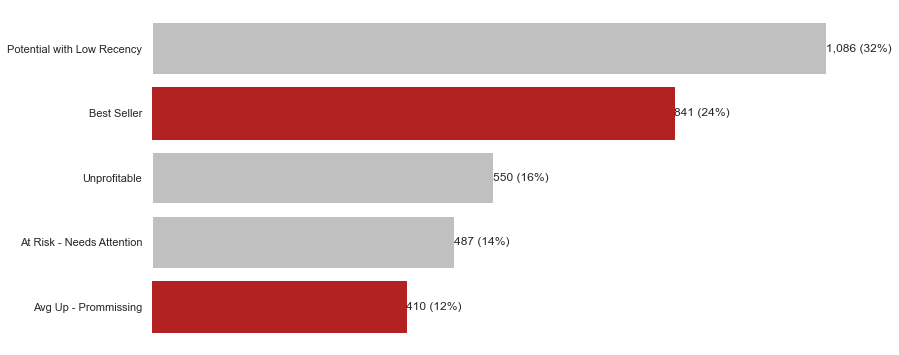

In [77]:
# Next we count the number of customers in each segment
segments_counts = rfm['group'].value_counts().sort_values(ascending=True)

# let's bar-plot each cluster's ratio

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Best Seller','Avg Up - Prommissing']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()


###### Conclusion:

There are a lot of products which are not bought frequently or recently and do not generate a good profit  (16% are unprofitable and 14% are at risk). 
However, 36% of the items are best sellers or promising (red bars) meaning that they are bought frequently, generate great profit and their recency is also high. 
32% of the products have potential and with an appropriaate strategy will become even more profitable. Their monetary and freqecy are mostly above average!

In [78]:
#df.to_csv(file_name, sep='\t')
rfm.to_csv('rfm_final.csv')

<b id="-conclusions">

## Conclusions and Suggestions

* Product Description Analysis

The number of orders increases from August 2019 until November 2019 which has the best sales considering units, range of product type and revenue. It is suggested to further investigate why November 2018 is the worst month.

The leading product in total sales is cake-stand with paper little birdie coming second and hanging heart t-light holder coming third in sales.

* Basket Analysis

The basket pair with the highest lift (13.3%) is 'rose regency teacup saucer' and 'regency teacup saucer'. Another strong basket pair is: 'bag polkadot' and 'storage bag suki'.
The online store can use a similar basket tool to find the top 10 products that resemble items which are missing or to imply marketing strategy on them. It is suggested to also investigate the products with the lowest support or the ones we consider unpopular for other reasons.

* RFM Analysis

The RFM analysis identified 36% of the products as best sellers or promising meaning that they are bought frequently, generate great profit and their recency is also high. 
Another 32% of the products have a good potential and and it is suggested to find a strategy to make them more profitable. 
There are also a lot of products (>30%) which are not bought frequently or recently and do not generate a good profit, these perhaps should removed from the store or require a drastic change in marketing or pricing.

